In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
from meth import conservation as cons
import matplotlib.pyplot as plt
plt.style.use('../Stochastic aging/pics/meth.mplstyle')

In [3]:
import pyBigWig
bw_mm10_phylop = pyBigWig.open("../meth/mm10.60way.phyloP60way.bw", "r")
bw_mm10_phastcons = pyBigWig.open("../meth/mm10.60way.phastCons.bw", "r")

# Stochastic CpGs


In [480]:
typ = 'final_corr'
if typ == 'final_corr':
    df = pd.read_csv('../scDNAm/For_Orr/Coreg_Stoch_51k_v2.csv')
    df.head()
df['phyloP'] = df['index'].apply(lambda x: cons.get_score(x, bw_mm10_phylop, format_from='chr_pos', score='phyloP', assembly='mm10'))
df['phastCons'] = df['index'].apply(lambda x: cons.get_score(x, bw_mm10_phastcons, format_from='chr_pos', score='phastCons', assembly='mm10'))

In [197]:
groups = ['coreg', 'stoch']
score = 'phyloP'
# score = 'phastCons'
corr_ths = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
scores = {}
for group in groups + ['rand']:
    scores[group] = {'mean': np.zeros(len(corr_ths)), 'std': np.zeros(len(corr_ths)),
                     '25%': np.zeros(len(corr_ths)), '75%': np.zeros(len(corr_ths)),
                     f'num_{group}': np.zeros(len(corr_ths))}
for i,corr_th in enumerate(corr_ths):
    df['coreg_mark'] = 'Background'
    for group in groups:
        df.loc[np.logical_and(df[f'{group}_{corr_th}'].values, 
               np.logical_not(df['random_subset'].values)), 'coreg_mark'] = f'{group}'
        scores[group][f'num_{group}'][i] = df[df.coreg_mark == group][score].values.shape[0]
        scores[group]['25%'][i] = np.nanpercentile(df[df.coreg_mark == group][score].values, 25)
        scores[group]['75%'][i] = np.nanpercentile(df[df.coreg_mark == group][score].values, 75)
        scores[group]['mean'][i] = np.nanmean(df[df.coreg_mark == group][score].values)
        scores[group]['std'][i] = np.nanstd(df[df.coreg_mark == group][score].values) / np.sqrt(df[df.coreg_mark == group][score].values.shape[0])
    df.loc[df['random_subset'].values, 'coreg_mark'] = 'rand'
    scores['rand']['mean'][i] = np.nanmean(df[df.coreg_mark == 'rand'][score].values)
    scores['rand']['std'][i] = np.nanstd(df[df.coreg_mark == 'rand'][score].values) / np.sqrt(df[df.coreg_mark == 'rand'][score].values.shape[0])
    scores['rand']['25%'][i] = np.nanpercentile(df[df.coreg_mark == 'rand'][score].values, 25)
    scores['rand']['75%'][i] = np.nanpercentile(df[df.coreg_mark == 'rand'][score].values, 75)
    scores['rand'][f'num_rand'][i] = df[df.coreg_mark == 'rand'][score].values.shape[0]

In [202]:
# group = 'stoch'
# scores[group][f'num_{group}']

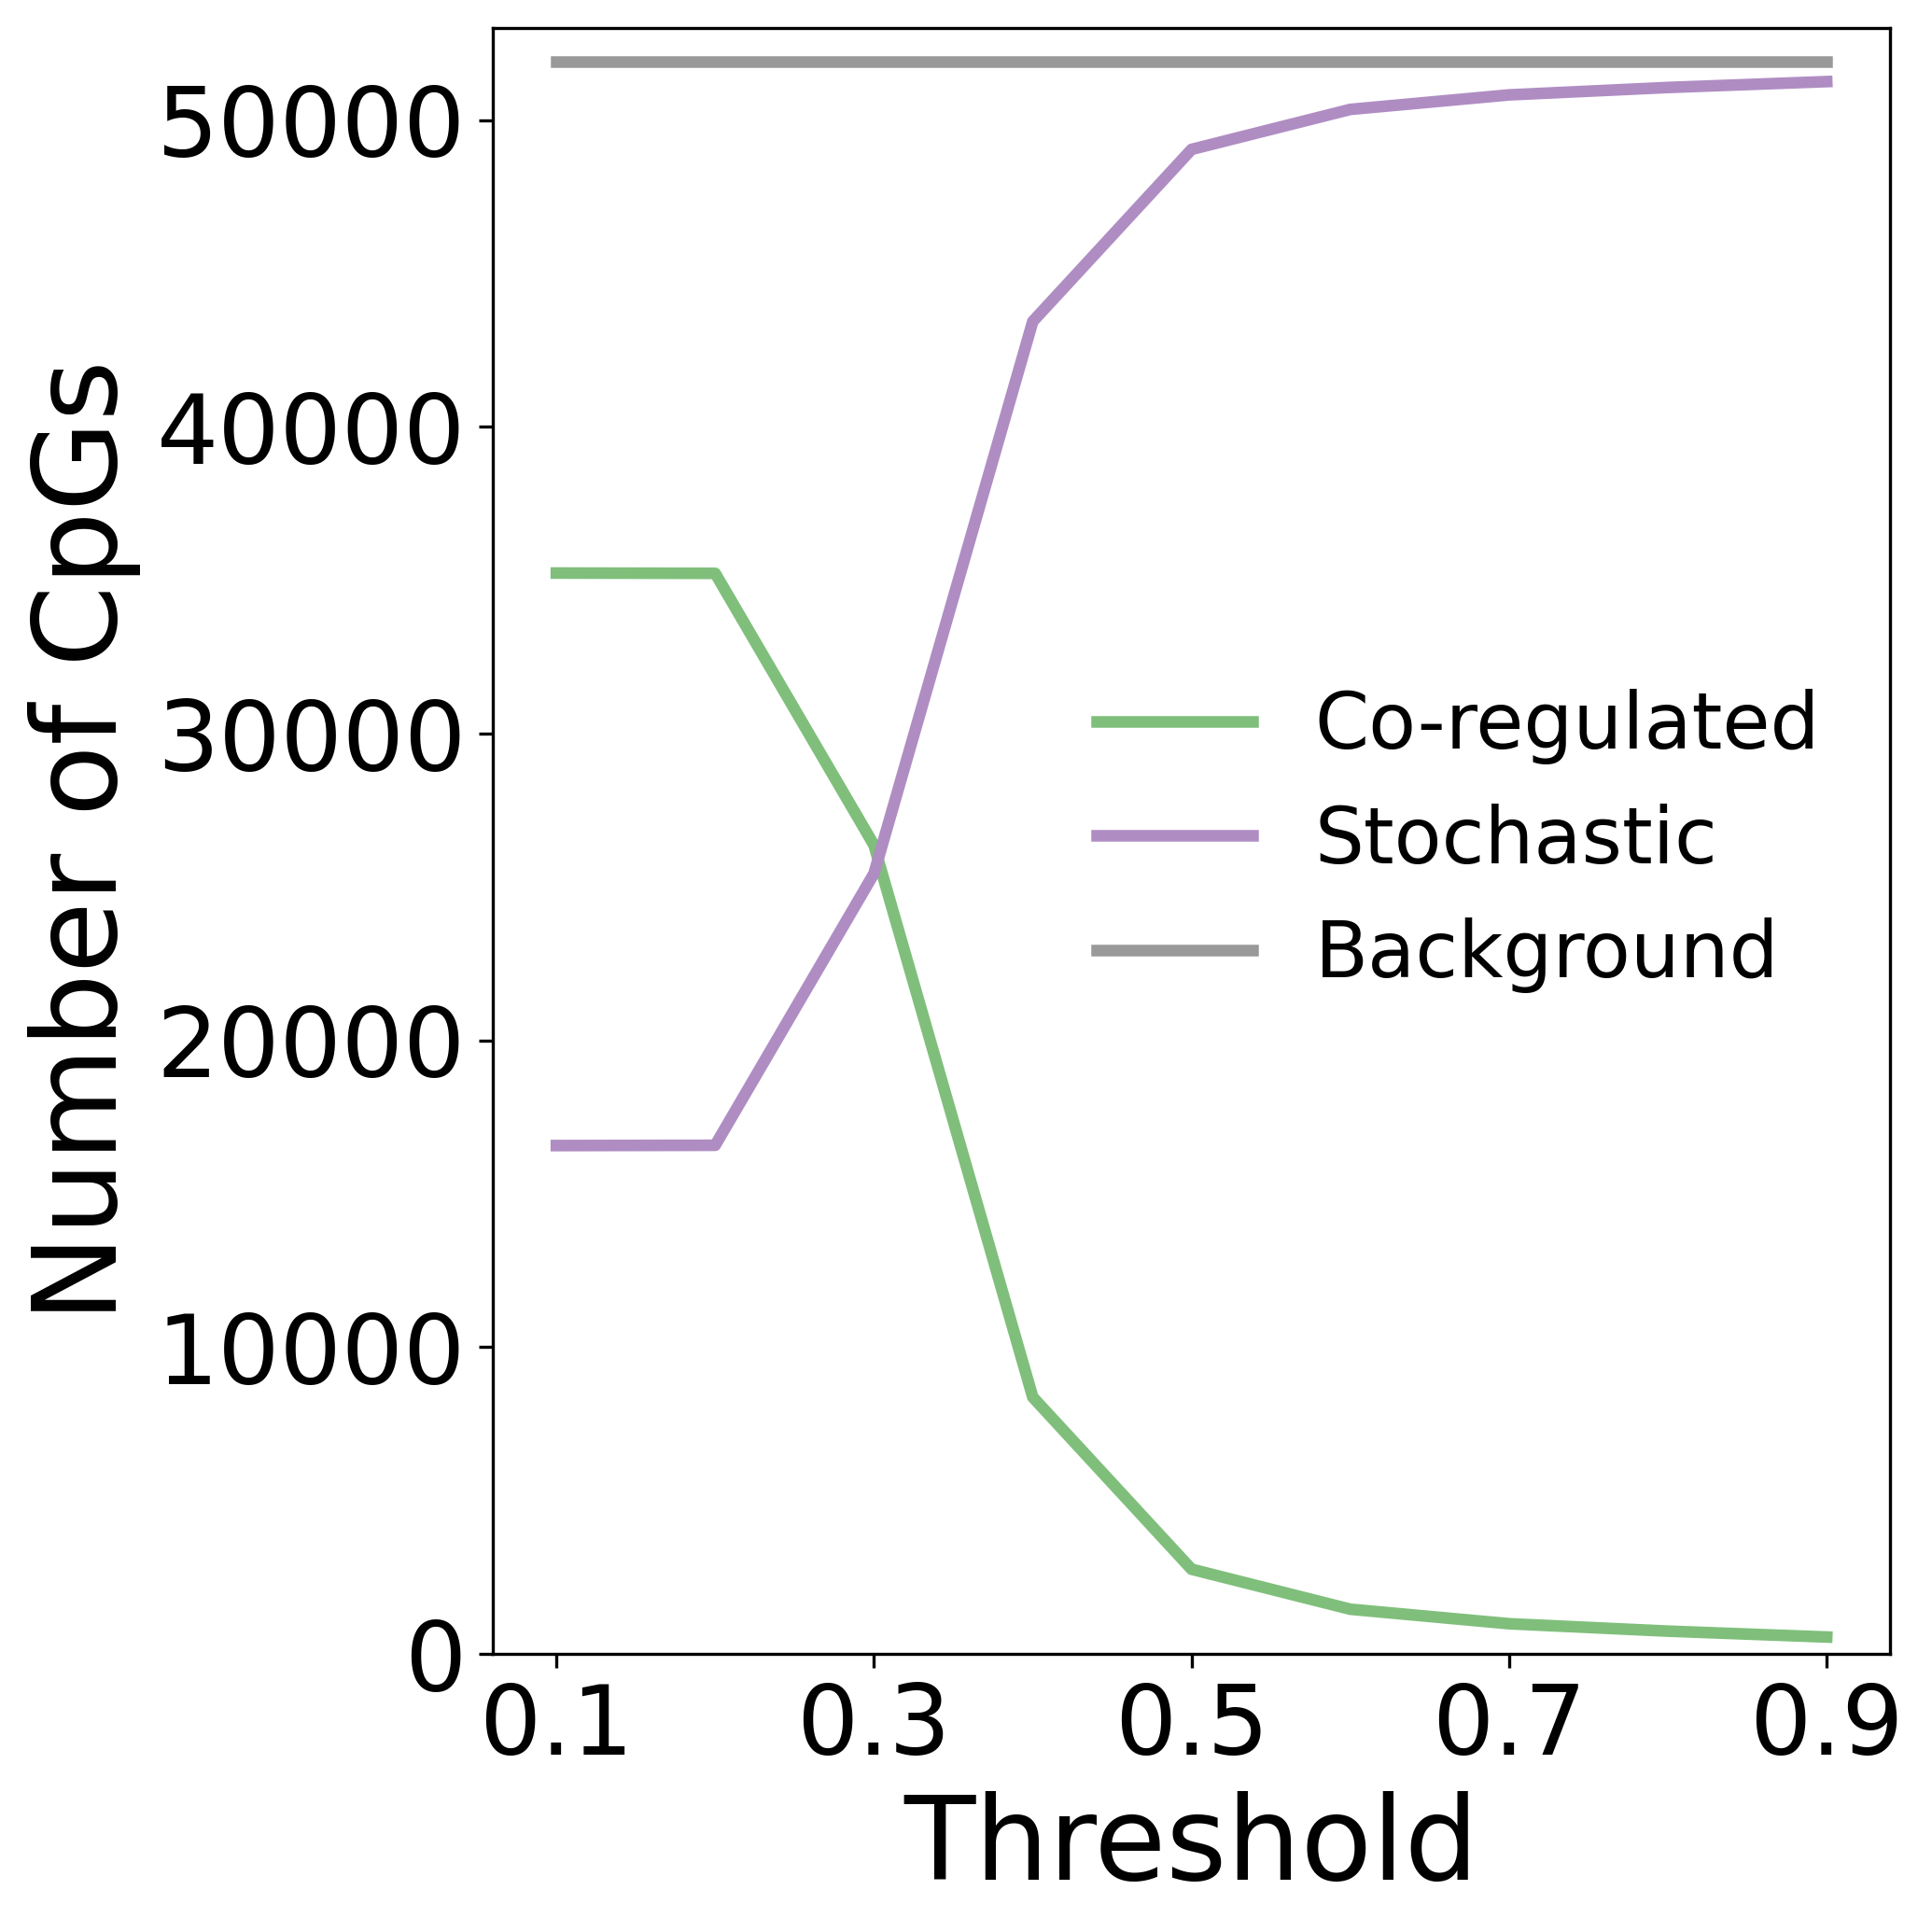

In [206]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.style.use('../Stochastic aging/pics/meth.mplstyle')
plt.figure(figsize=(7,7), dpi=300)

lab2name = {'coreg': 'Co-regulated',
            'stoch': 'Stochastic',
            'rand': 'Background'}
lab2color = {'coreg': '#7fbf7b',
            'stoch': '#af8dc3',
            'rand': '#999999'}

for group in groups + ['rand']:
    try:
        plt.plot(corr_ths, scores[group][f'num_{group}'], label=lab2name[group], 
                     color=lab2color[group], #lw=3,#capsize=5, 
            )
        # plt.fill_between(corr_ths, scores[group]['25%'], scores[group]['75%'], label=group, lw=1, alpha=0.3)
    except:
        continue
plt.xlabel('Threshold')
plt.ylabel(f'Number of CpGs')
# if score == 'phyloP':
#     plt.yticks([0.1, 0.2, 0.30, 0.4, 0.5])
# elif score == 'phastCons':
#     plt.yticks([0.15, 0.20, 0.25])

# plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.ylim([0,53000])
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9])
plt.legend(loc='center right')
plt.savefig(f'PICS/NumbersOfCpGs_{score}.png', format='png', dpi=300)
plt.show()

# Conservation scores by threshold

In [486]:
groups = ['coreg', 'stoch']
score = 'phyloP'
# score = 'phastCons'
corr_ths = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
scores = {}
for group in groups + ['rand']:
    scores[group] = {'mean': np.zeros(len(corr_ths)), 'std': np.zeros(len(corr_ths)),
                     '25%': np.zeros(len(corr_ths)), '75%': np.zeros(len(corr_ths))}
for i,corr_th in enumerate(corr_ths):
    df['coreg_mark'] = 'Background'
    for group in groups:
        df.loc[np.logical_and(df[f'{group}_{corr_th}'].values, 
               np.logical_not(df['random_subset'].values)), 'coreg_mark'] = f'{group}'
        scores[group]['25%'][i] = np.nanpercentile(df[df.coreg_mark == group][score].values, 25)
        scores[group]['75%'][i] = np.nanpercentile(df[df.coreg_mark == group][score].values, 75)
        scores[group]['mean'][i] = np.nanmean(df[df.coreg_mark == group][score].values)
        scores[group]['std'][i] = np.nanstd(df[df.coreg_mark == group][score].values) / np.sqrt(df[df.coreg_mark == group][score].values.shape[0])
    df.loc[df['random_subset'].values, 'coreg_mark'] = 'rand'
    scores['rand']['mean'][i] = np.nanmean(df[df.coreg_mark == 'rand'][score].values)
    scores['rand']['std'][i] = np.nanstd(df[df.coreg_mark == 'rand'][score].values) / np.sqrt(df[df.coreg_mark == 'rand'][score].values.shape[0])
    scores['rand']['25%'][i] = np.nanpercentile(df[df.coreg_mark == 'rand'][score].values, 25)
    scores['rand']['75%'][i] = np.nanpercentile(df[df.coreg_mark == 'rand'][score].values, 75)


# Fig. 6c

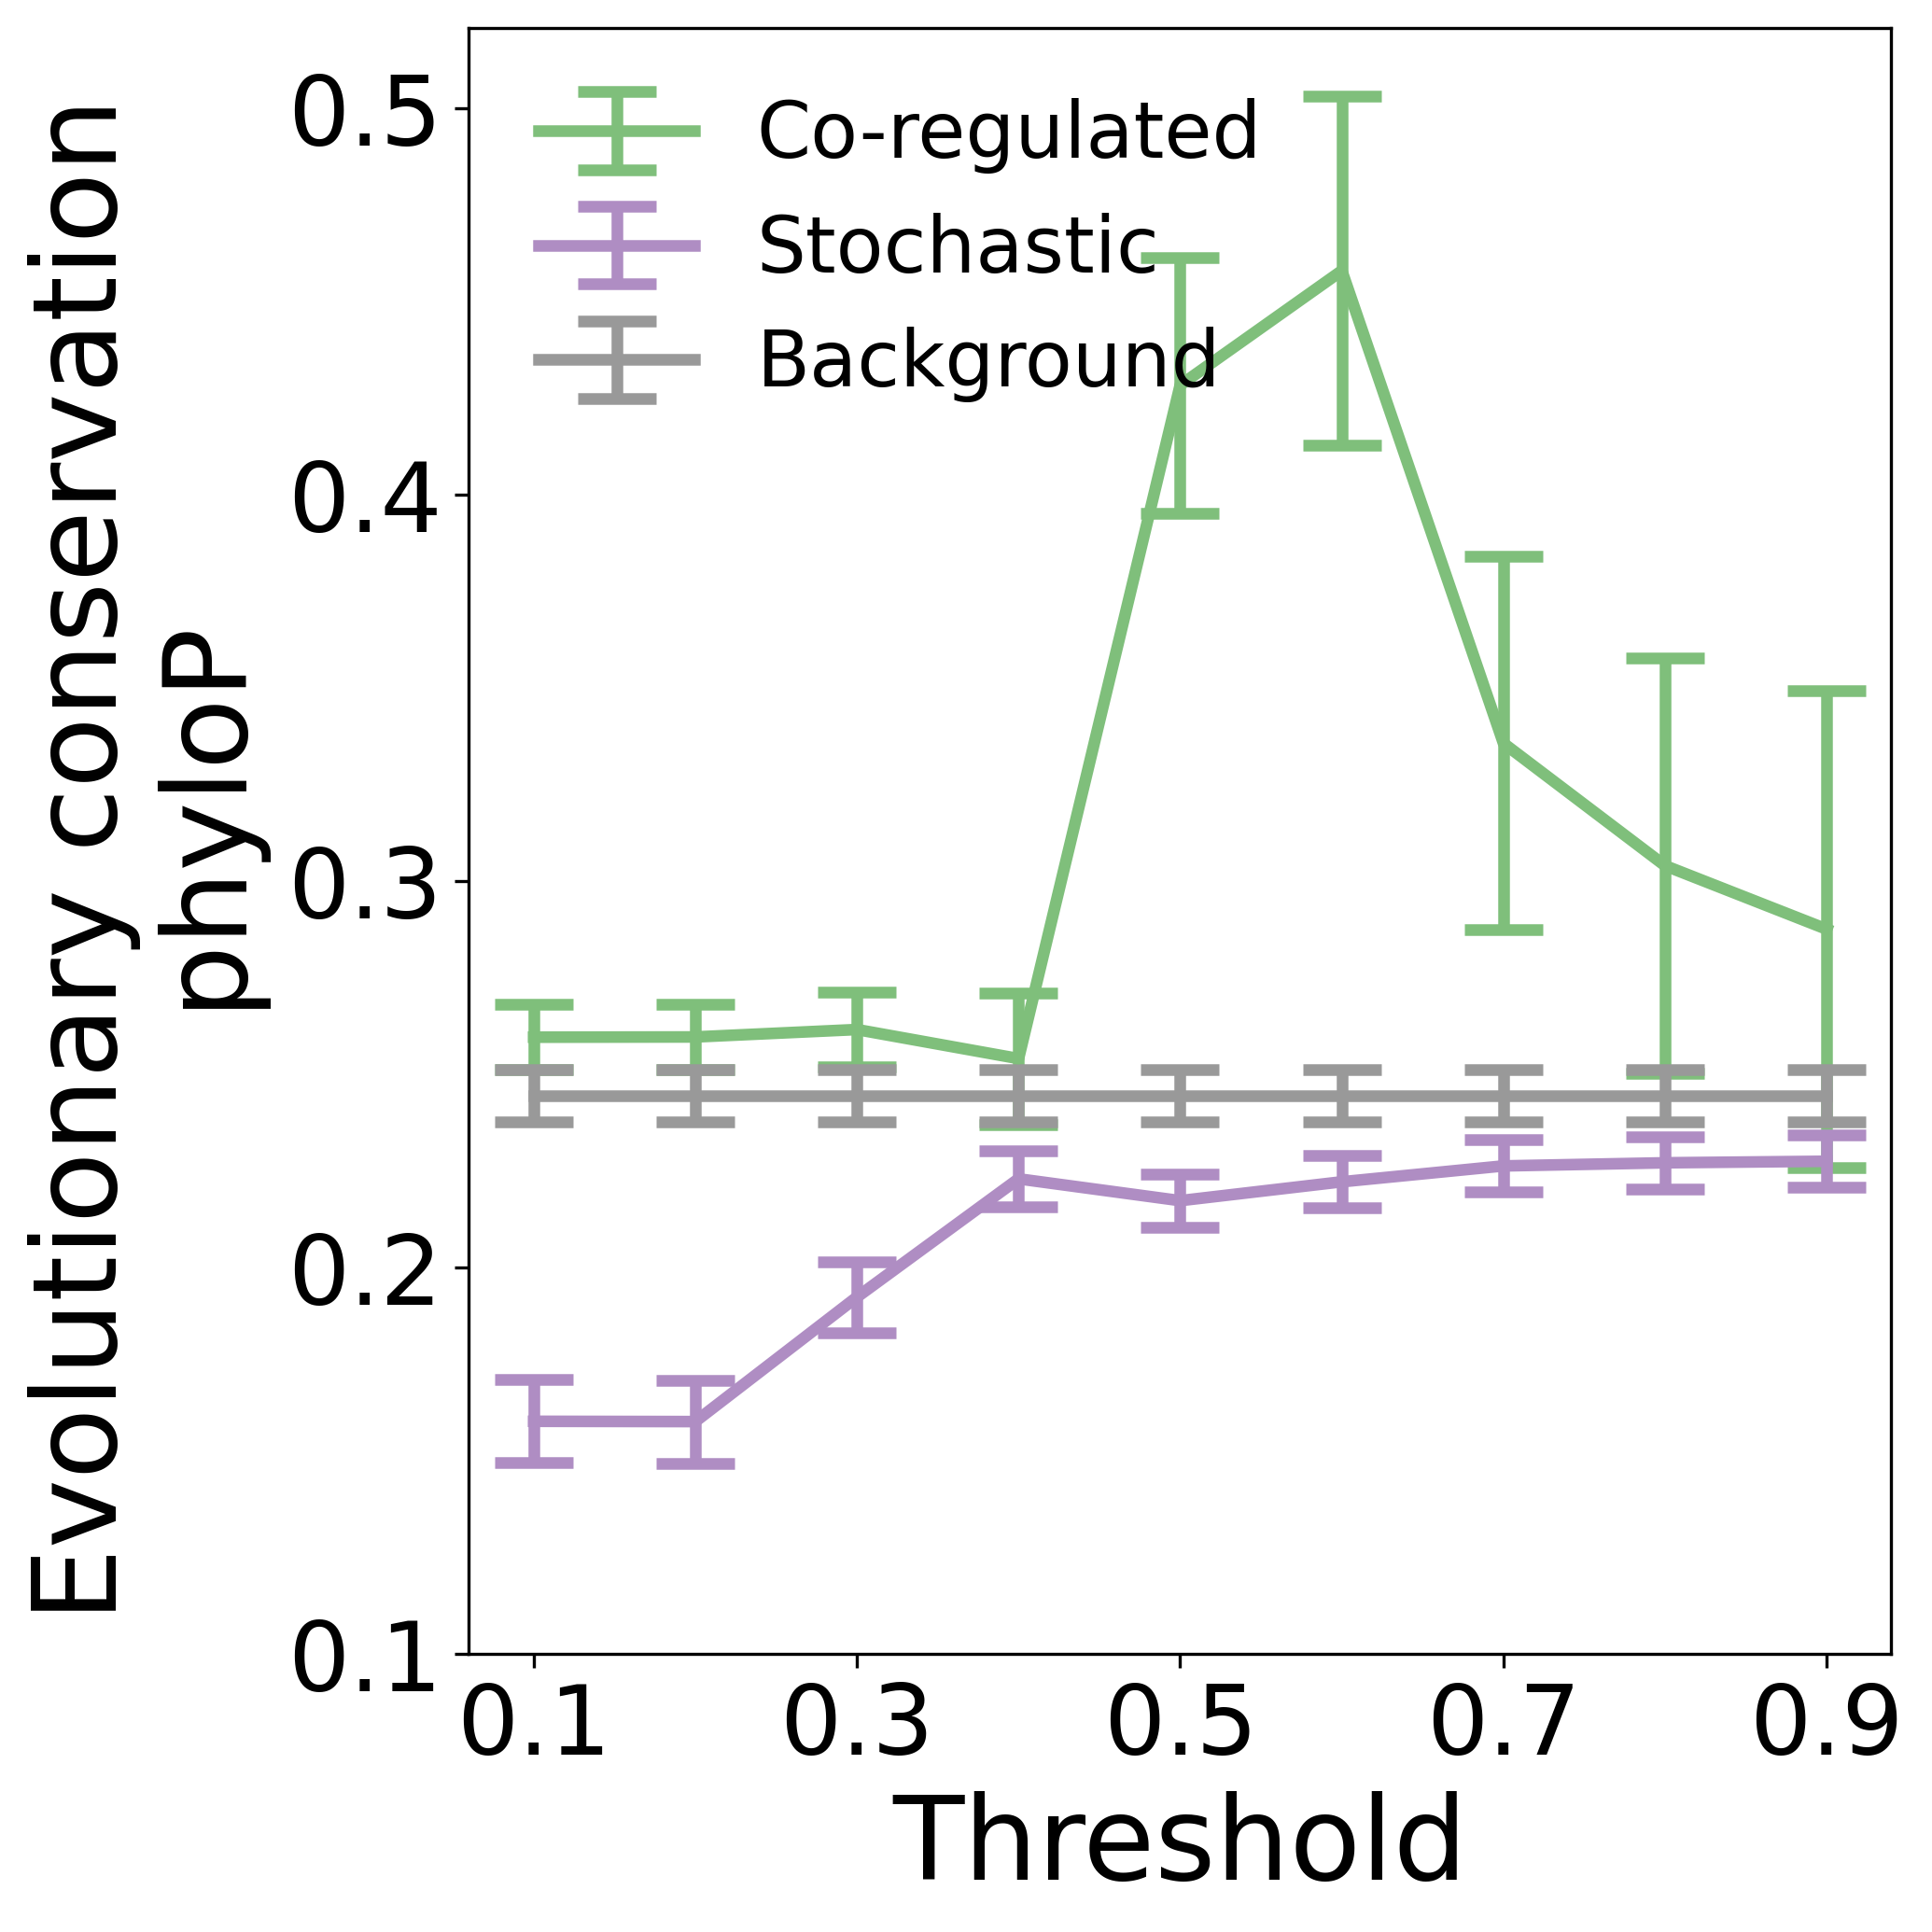

In [488]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.style.use('../Stochastic aging/pics/meth.mplstyle')
plt.figure(figsize=(7,7), dpi=300)
lab2name = {'coreg': 'Co-regulated',
            'stoch': 'Stochastic',
            'rand': 'Background'}
lab2color = {'coreg': '#7fbf7b',
            'stoch': '#af8dc3',
            'rand': '#999999'}
for group in groups + ['rand']:
    try:
        plt.errorbar(corr_ths, scores[group]['mean'], scores[group]['std'], label=lab2name[group], 
                     color=lab2color[group], #lw=3,#capsize=5, 
                     capthick=3,
            )
        # plt.fill_between(corr_ths, scores[group]['25%'], scores[group]['75%'], label=group, lw=1, alpha=0.3)
    except:
        continue
plt.xlabel('Threshold')
plt.ylabel(f'Evolutionary conservation \n {score}')
if score == 'phyloP':
    plt.yticks([0.1, 0.2, 0.30, 0.4, 0.5])
    plt.legend(loc='upper left')

elif score == 'phastCons':
    plt.yticks([0.15, 0.20, 0.25])
    plt.legend(loc='upper left')

# plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.xticks([0.1, 0.3, 0.5, 0.7, 0.9])
plt.savefig(f'PICS/EvolCons_{score}.png', format='png', dpi=300)
plt.show()

# EvolCons plots

In [290]:
score = 'phyloP'
# score = 'phastCons'
corr_ths = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
corr_th = 0.5
df['coreg_mark'] = 'NaN'
df.loc[np.logical_and(np.logical_not(df[f'random_subset'].values),
                      df[f'coreg_{corr_th}'].values), 'coreg_mark'] = 'coreg'
df.loc[np.logical_and(np.logical_not(df[f'random_subset'].values),
                      df[f'stoch_{corr_th}'].values), 'coreg_mark'] = 'stoch'
# df.loc[df['changes_with_age'].values, 'coreg_mark'] = 'changes_with_age'
df.loc[df['random_subset'].values, 'coreg_mark'] = 'rand'

In [309]:
# score = 'phyloP'
score = 'phastCons'
corr_ths = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]#np.arange(1, 10) * 0.1
corr_th = 0.5
df['hyper_mark'] = 'NaN'
df.loc[np.logical_and(np.logical_not(df[f'random_subset'].values),
                      df['hypermethylated_with_age'].values), 'hyper_mark'] = 'Hypermethylated'
df.loc[np.logical_and(np.logical_not(df[f'random_subset'].values),
                      df['hypomethylated_with_age'].values), 'hyper_mark'] = 'Hypomethylated'
# df.loc[df['changes_with_age'].values, 'coreg_mark'] = 'changes_with_age'
df.loc[df['random_subset'].values, 'hyper_mark'] = 'Background'

In [283]:
df

,index,hypermethylated_with_age,hypomethylated_with_age,random_subset,coreg_0.1,stoch_0.1,coreg_0.2,stoch_0.2,coreg_0.3,stoch_0.3,...,stoch_0.6,coreg_0.7,stoch_0.7,coreg_0.8,stoch_0.8,coreg_0.9,stoch_0.9,phyloP,phastCons,coreg_mark
0,chr10_100017344,False,True,True,True,False,True,False,True,False,...,True,False,True,False,True,False,True,-0.143,0.000,Background
1,chr10_100023398,True,False,False,False,True,False,True,False,True,...,True,False,True,False,True,False,True,0.265,0.000,Stochastic
2,chr10_100025890,True,False,False,True,False,True,False,True,False,...,True,False,True,False,True,False,True,0.178,0.000,Stochastic
3,chr10_100025896,True,False,False,True,False,True,False,True,False,...,True,False,True,False,True,False,True,0.022,0.000,Stochastic
4,chr10_100053911,False,True,True,True,False,True,False,True,False,...,True,False,True,False,True,False,True,0.234,0.261,Background
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103785,chrY_90829072,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,NaN,NaN,Background
103786,chrY_946514,True,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,NaN,NaN,Stochastic
103787,chrY_9958213,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,NaN,NaN,Background
103788,chrY_999103,False,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,NaN,NaN,Background


Mann-Whitney
coreg
0.22758329334805524 0.3800519045381797
rand
0.1782242128073793 0.3394953263673113
stoch
0.1693001550927816 0.3316044988189969


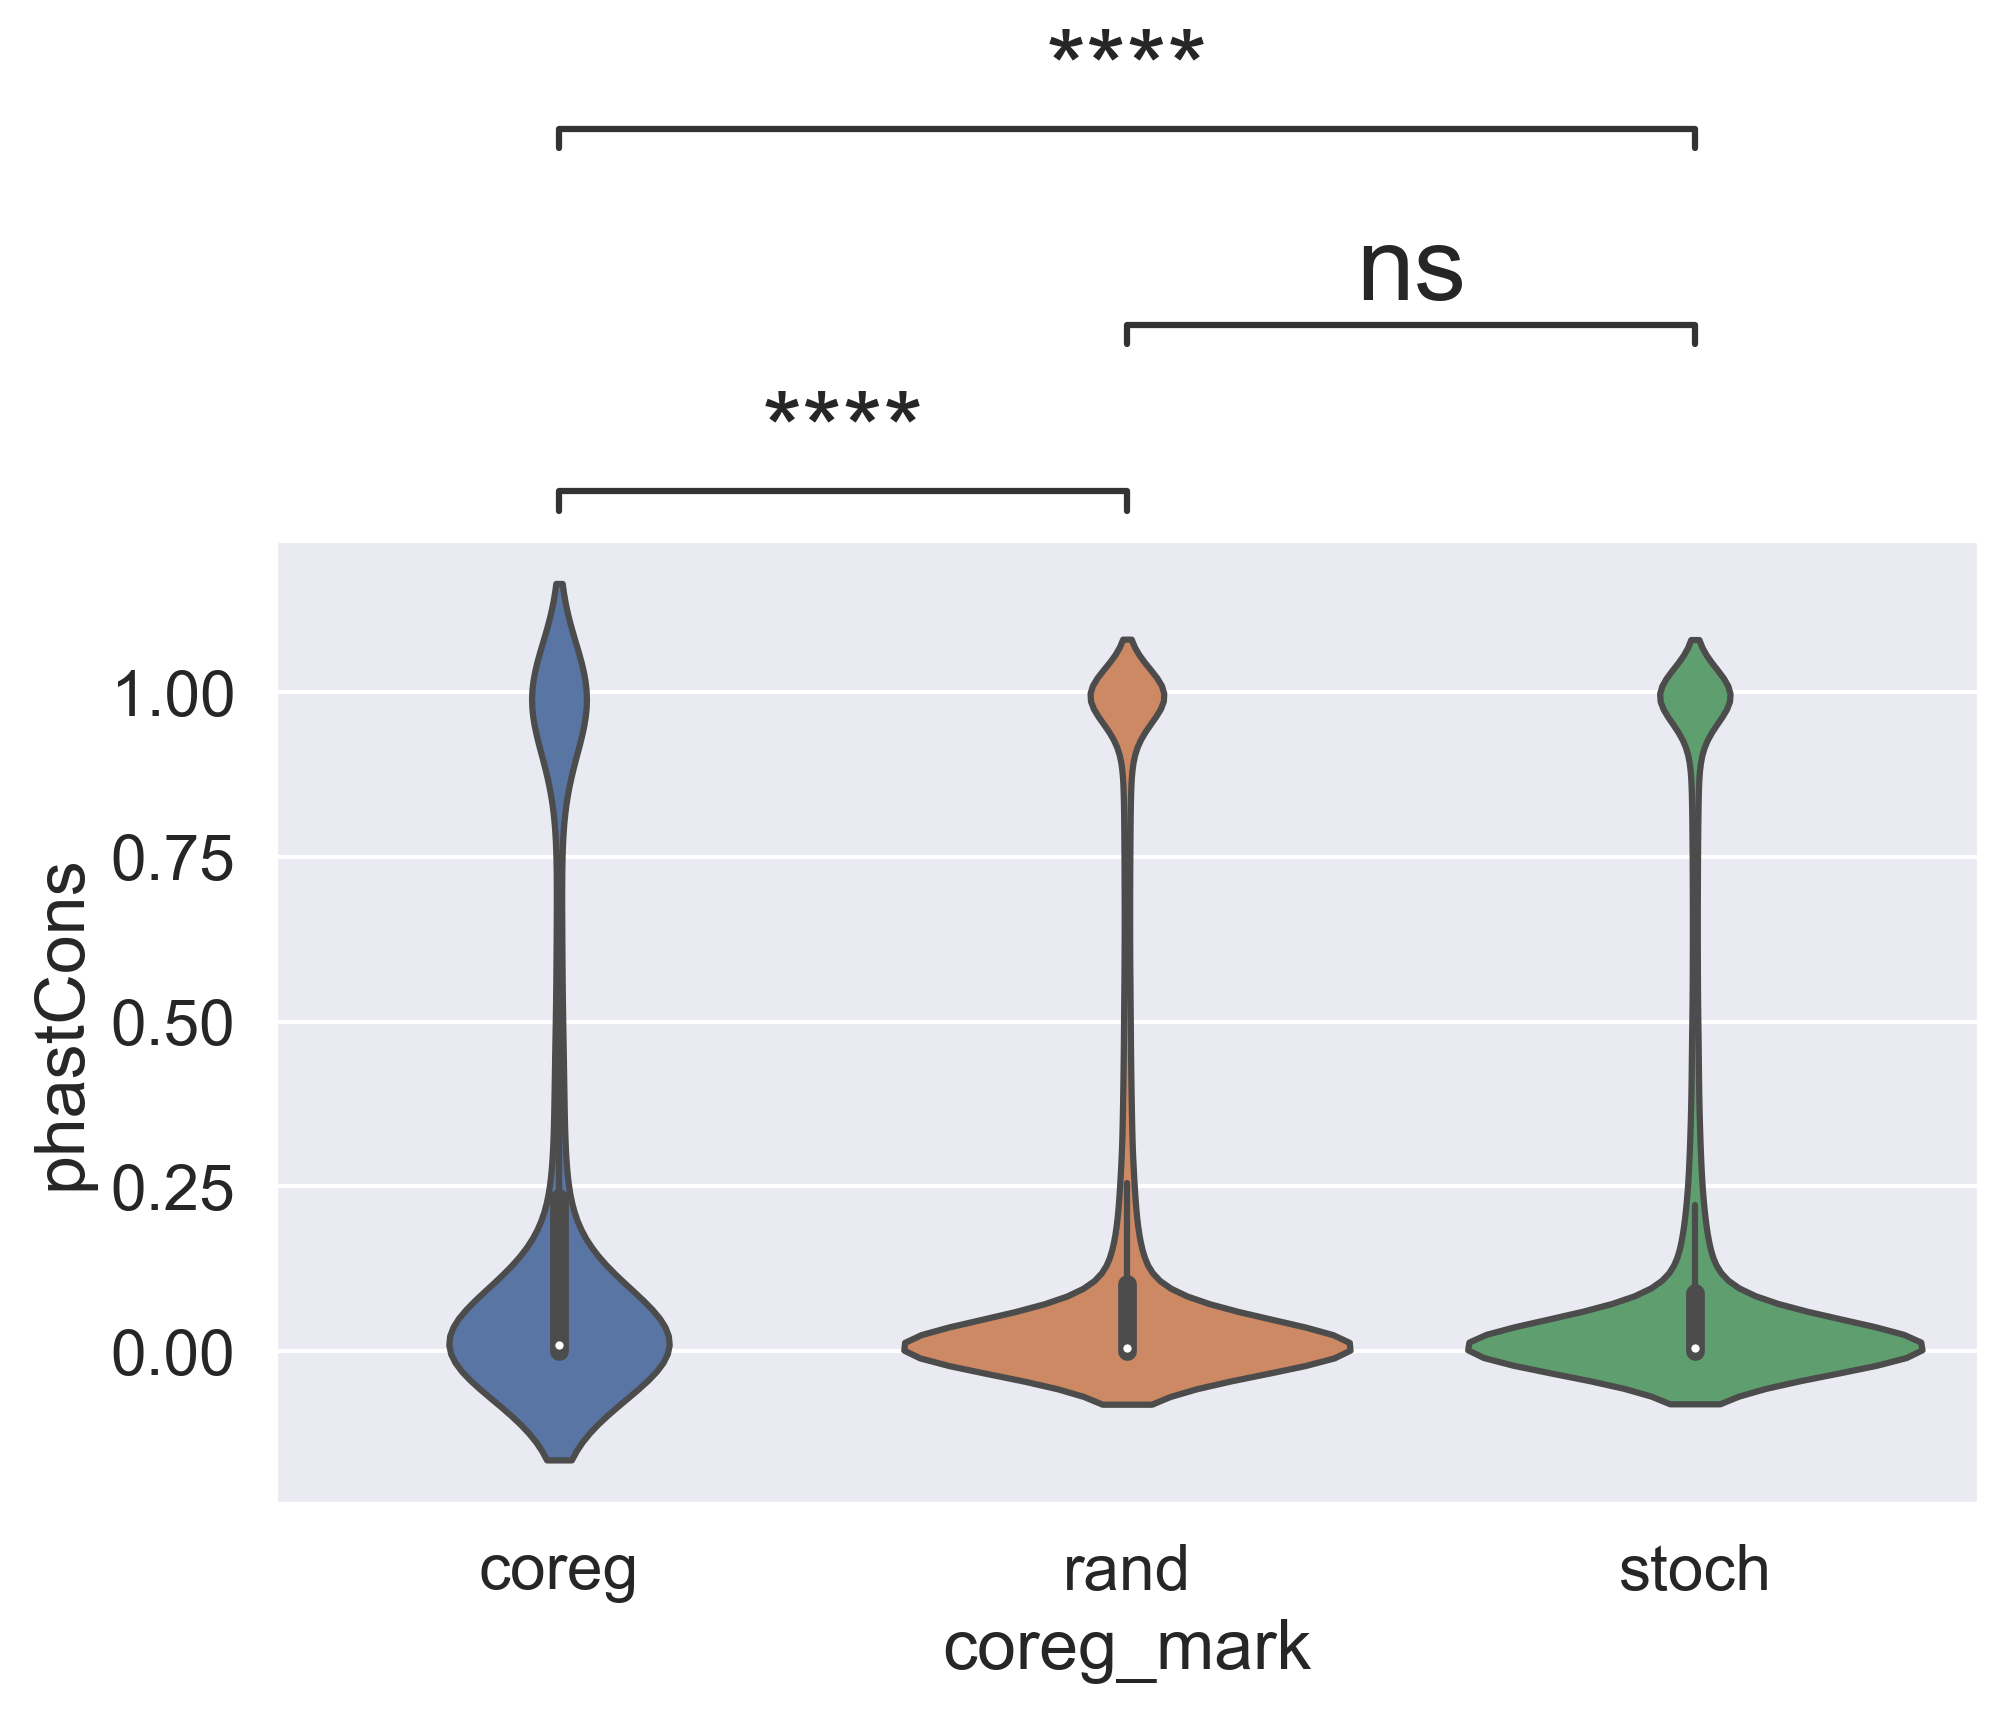

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
from statannotations.Annotator import Annotator

sns.set(style="whitegrid")
df_ex = sns.load_dataset("tips")

x = 'coreg_mark'
# x = "hyper_mark"

# y = "phyloP" 
y = "phastCons"

oldkey = ''

sns.set(font_scale = 1.7)
tests = ['Mann-Whitney']
order = df[x].unique()
order = np.setdiff1d(order, ['Background'])
box_pairs=[(order[x],order[y]) for x in range(0, len(order)) for y in range(x+1, len(order))]

with sns.plotting_context('notebook', font_scale = 1.4):
    for test in tests:
        print(test)
        try:
        # if True:
            for feat in order:
                print(feat)
                print(df[df[x] == feat][y].mean(), df[df[x] == feat][y].std())
            fig, ax = plt.subplots(1,1, figsize=(7,6),dpi=300)
            ax = sns.violinplot(data=df, x=x, y=y, order=order, fontsize=50)            
            annotator = Annotator(ax, box_pairs, data=df, x=x, y=y, order=order,
                                 )
            annotator.configure(test=test, 
                                text_format='star', 
                                loc='outside',
                                verbose=0,
                                fontsize=25)
            annotator.apply_and_annotate()
            plt.savefig(f'../scDNAm/PICS/png/T_test_coreg_stoch_{x}_{y}_{test}{oldkey}_losscoreg.png', format='png', dpi=300)
            plt.show()
        except:
            print(test, 'ERROR')
            continue

In [257]:

df['coreg_mark'].value_counts()

Background      51895
Stochastic      49043
Co-regulated     2625
NaN               227
Name: coreg_mark, dtype: int64

# Paper EvolConst plots

# Fig. 6a

Mann-Whitney
Co-regulated
0.42952052102981153 1.7472841467247244
Stochastic
0.21732789624099436 1.5111632397949737
Background
0.24452873590952304 1.5307737722688668


<Figure size 2100x2100 with 0 Axes>

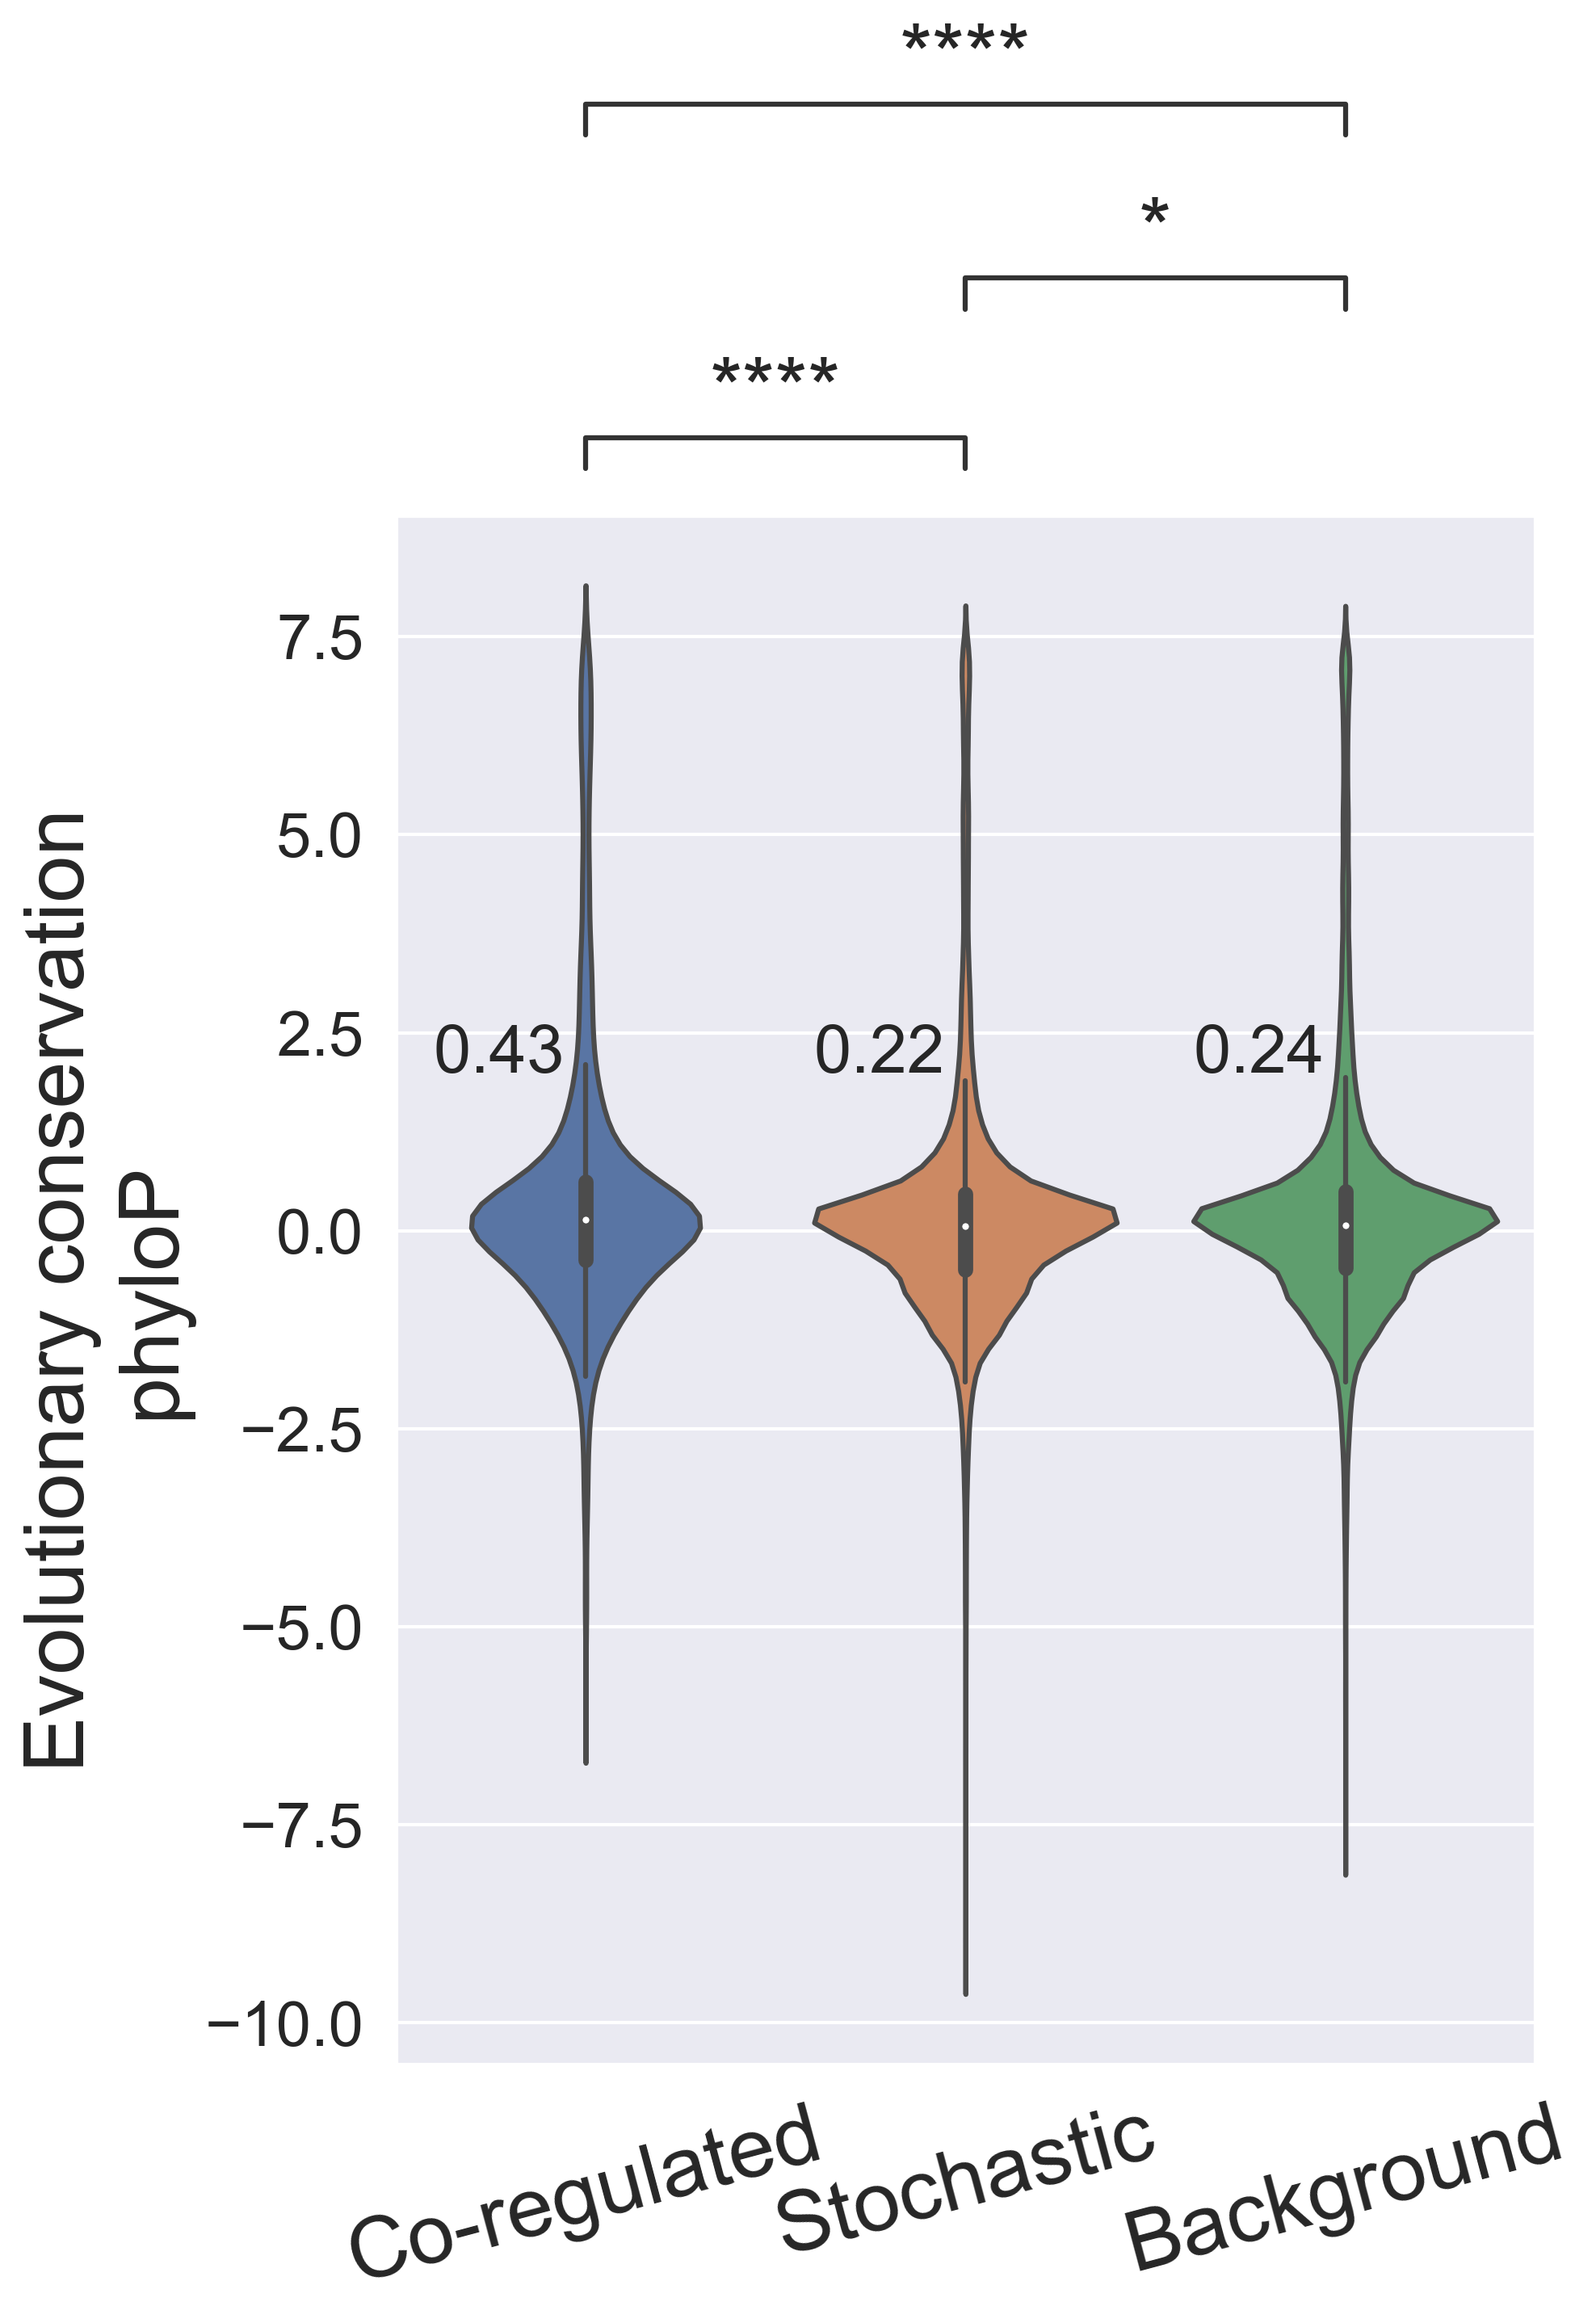

In [344]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

# sns.set(style="whitegrid")
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.style.use('../Stochastic aging/pics/meth.mplstyle')
sns.set_style("whitegrid")
plt.figure(figsize=(7,7), dpi=300)

df_ex = sns.load_dataset("tips")
lab2name = {'coreg': 'Co-regulated',
            'stoch': 'Stochastic',
            'rand': 'Background',
            'Background': 'NaN',
            'NaN' : 'NaN'}

lab2color = {'coreg': '#7fbf7b',
            'stoch': '#af8dc3',
            'rand': '#999999'}
x = "coreg_mark"
y = "phyloP"
# y = "phastCons"
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

# df[x] = df[x].apply(lambda x: lab2name[x])
sns.set(font_scale = 1.7, )
tests = ['Mann-Whitney']#, 't-test_welch', 't-test_paired', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal']
order = ['Co-regulated', 'Stochastic', 'Background']
# order = df[x].unique()
# order = np.setdiff1d(order, ['NaN'])
box_pairs=[(order[x],order[y]) for x in range(0, len(order)) for y in range(x+1, len(order))]

# order = ['Hypermethylated', 'Hypomethylated', 'Background']
box_pairs
for test in tests:
    print(test)
    # try:
    if True:
        for feat in order:
            print(feat)
            print(df[df[x] == feat][y].mean(), df[df[x] == feat][y].std())
        fig, ax = plt.subplots(1,1, figsize=(7,10),dpi=300)
        # ax = sns.stripplot(data=df, x=x, y=y, order=order, palette="Set2", alpha=0.01)
        ax = sns.violinplot(data=df, x=x, y=y, order=order, fontsize=50)#, palette="Set2", alpha=0.01)
        # ax = sns.boxplot(data=df, x=x, y=y, order=order, palette="Set2")
        
        annotator = Annotator(ax, box_pairs, data=df, x=x, y=y, order=order,
                             )
        annotator.configure(test=test, 
                            #test='Wilcoxon-legacy',
                            text_format='star', 
                            # text_format='simple', 
                            loc='outside',
                            # loc='inside',
                            verbose=0, #fontsize=15,)
                            fontsize=25)
        annotator.apply_and_annotate()
        plt.xlabel(None)
        if y == 'phyloP':
            plt.text(0-0.4,2,'0.43', fontsize=20)
            plt.text(1-0.4,2,'0.22', fontsize=20)
            plt.text(2-0.4,2,'0.24', fontsize=20)
        else:
            plt.text(0-0.4,0.2,'0.20', fontsize=20)
            plt.text(1-0.4,0.2,'0.17', fontsize=20)
            plt.text(2-0.4,0.2,'0.18', fontsize=20)
        plt.xticks(fontsize=25, rotation=15)

        plt.ylabel('Evolutionary conservation\nphyloP', fontsize=25)
        plt.tight_layout()
        plt.savefig(f'../scDNAm/PICS/png/MWW_coreg_stoch_{x}_{y}_{test}{oldkey}.png', format='png', dpi=300)
        plt.show()
    # except:
    #     continue

# Fig. 6b

Mann-Whitney
Hypermethylated
0.20720807657526086 1.4821368181293624
Hypomethylated
0.2465494218182482 1.5624984356170688
Background
0.24452873590952304 1.5307737722688668


<Figure size 2100x2100 with 0 Axes>

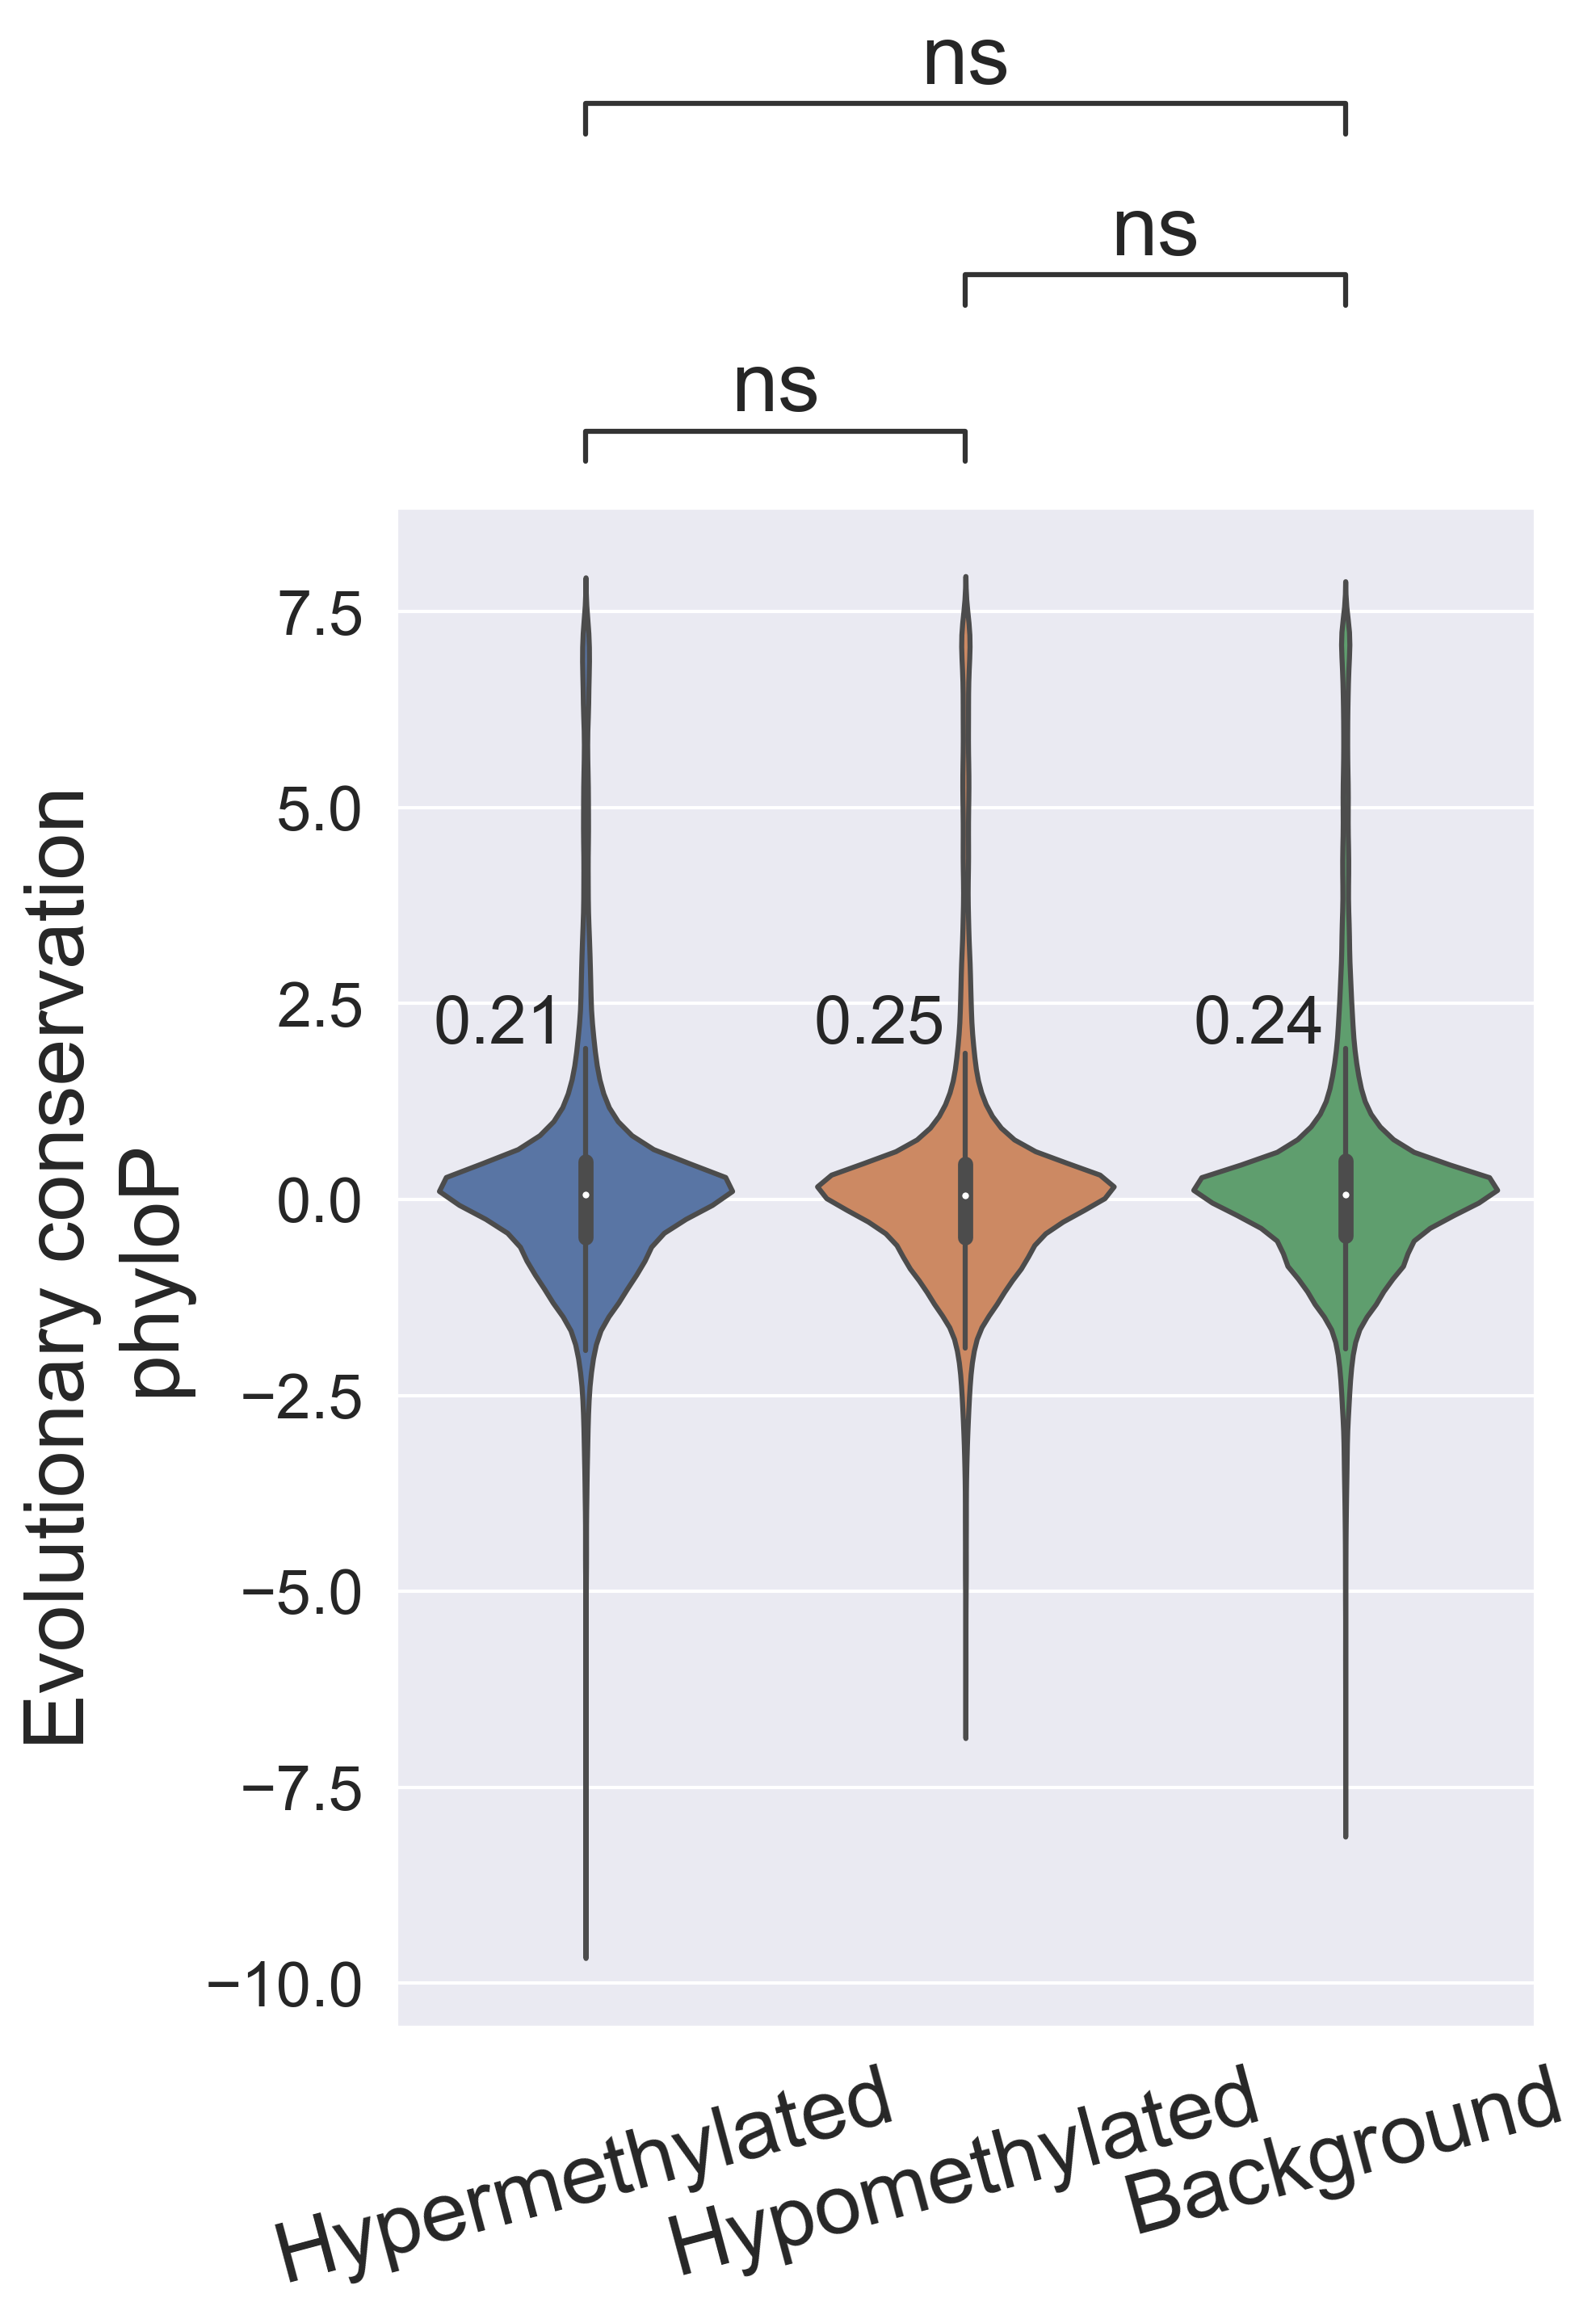

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

# sns.set(style="whitegrid")
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.style.use('../Stochastic aging/pics/meth.mplstyle')
sns.set_style("whitegrid")
plt.figure(figsize=(7,7), dpi=300)

df_ex = sns.load_dataset("tips")
lab2name = {'coreg': 'Co-regulated',
            'stoch': 'Stochastic',
            'rand': 'Background',
            'Background': 'NaN'}

lab2color = {'coreg': '#7fbf7b',
            'stoch': '#af8dc3',
            'rand': '#999999'}
# x = "coreg_mark"
x = "hyper_mark"
y = "phyloP"
# y = "phastCons"
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

# df[x] = df[x].apply(lambda x: lab2name[x])
sns.set(font_scale = 1.7, )
tests = ['Mann-Whitney']#, 't-test_welch', 't-test_paired', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal']
# order = ['Co-regulated', 'Stochastic', 'Background']
order = ['Hypermethylated', 'Hypomethylated', 'Background']
# order = df[x].unique()
# order = np.setdiff1d(order, ['NaN'])
box_pairs=[(order[x],order[y]) for x in range(0, len(order)) for y in range(x+1, len(order))]

# order = ['Hypermethylated', 'Hypomethylated', 'Background']

for test in tests:
    print(test)
    # try:
    if True:
        for feat in order:
            print(feat)
            print(df[df[x] == feat][y].mean(), df[df[x] == feat][y].std())
        fig, ax = plt.subplots(1,1, figsize=(7,10),dpi=300)
        # ax = sns.stripplot(data=df, x=x, y=y, order=order, palette="Set2", alpha=0.01)
        ax = sns.violinplot(data=df, x=x, y=y, order=order, fontsize=50)#, palette="Set2", alpha=0.01)
        # ax = sns.boxplot(data=df, x=x, y=y, order=order, palette="Set2")
        
        annotator = Annotator(ax, box_pairs, data=df, x=x, y=y, order=order,
                             )
        annotator.configure(test=test, 
                            #test='Wilcoxon-legacy',
                            text_format='star', 
                            # text_format='simple', 
                            loc='outside',
                            # loc='inside',
                            verbose=0, #fontsize=15,)
                            fontsize=25)
        annotator.apply_and_annotate()
        plt.xlabel(None)
        if y == 'phyloP':
            plt.text(0-0.4,2,'0.21', fontsize=20)
            plt.text(1-0.4,2,'0.25', fontsize=20)
            plt.text(2-0.4,2,'0.24', fontsize=20)
        else:
            plt.text(0-0.4,0.2,'0.20', fontsize=20)
            plt.text(1-0.4,0.2,'0.17', fontsize=20)
            plt.text(2-0.4,0.2,'0.18', fontsize=20)
        plt.xticks(fontsize=25, rotation=15)
        plt.ylabel('Evolutionary conservation\nphyloP', fontsize=25)
        plt.tight_layout()
        plt.savefig(f'../scDNAm/PICS/png/MWW_hyper_hypo_{x}_{y}_{test}{oldkey}.png', format='png', dpi=300)
        plt.show()
    # except:
    #     continue

Mann-Whitney
Co-regulated
0.22758329334805524 0.3800519045381797
Stochastic
0.1693001550927816 0.3316044988189969
Background
0.1782242128073793 0.3394953263673113


<Figure size 2100x2100 with 0 Axes>

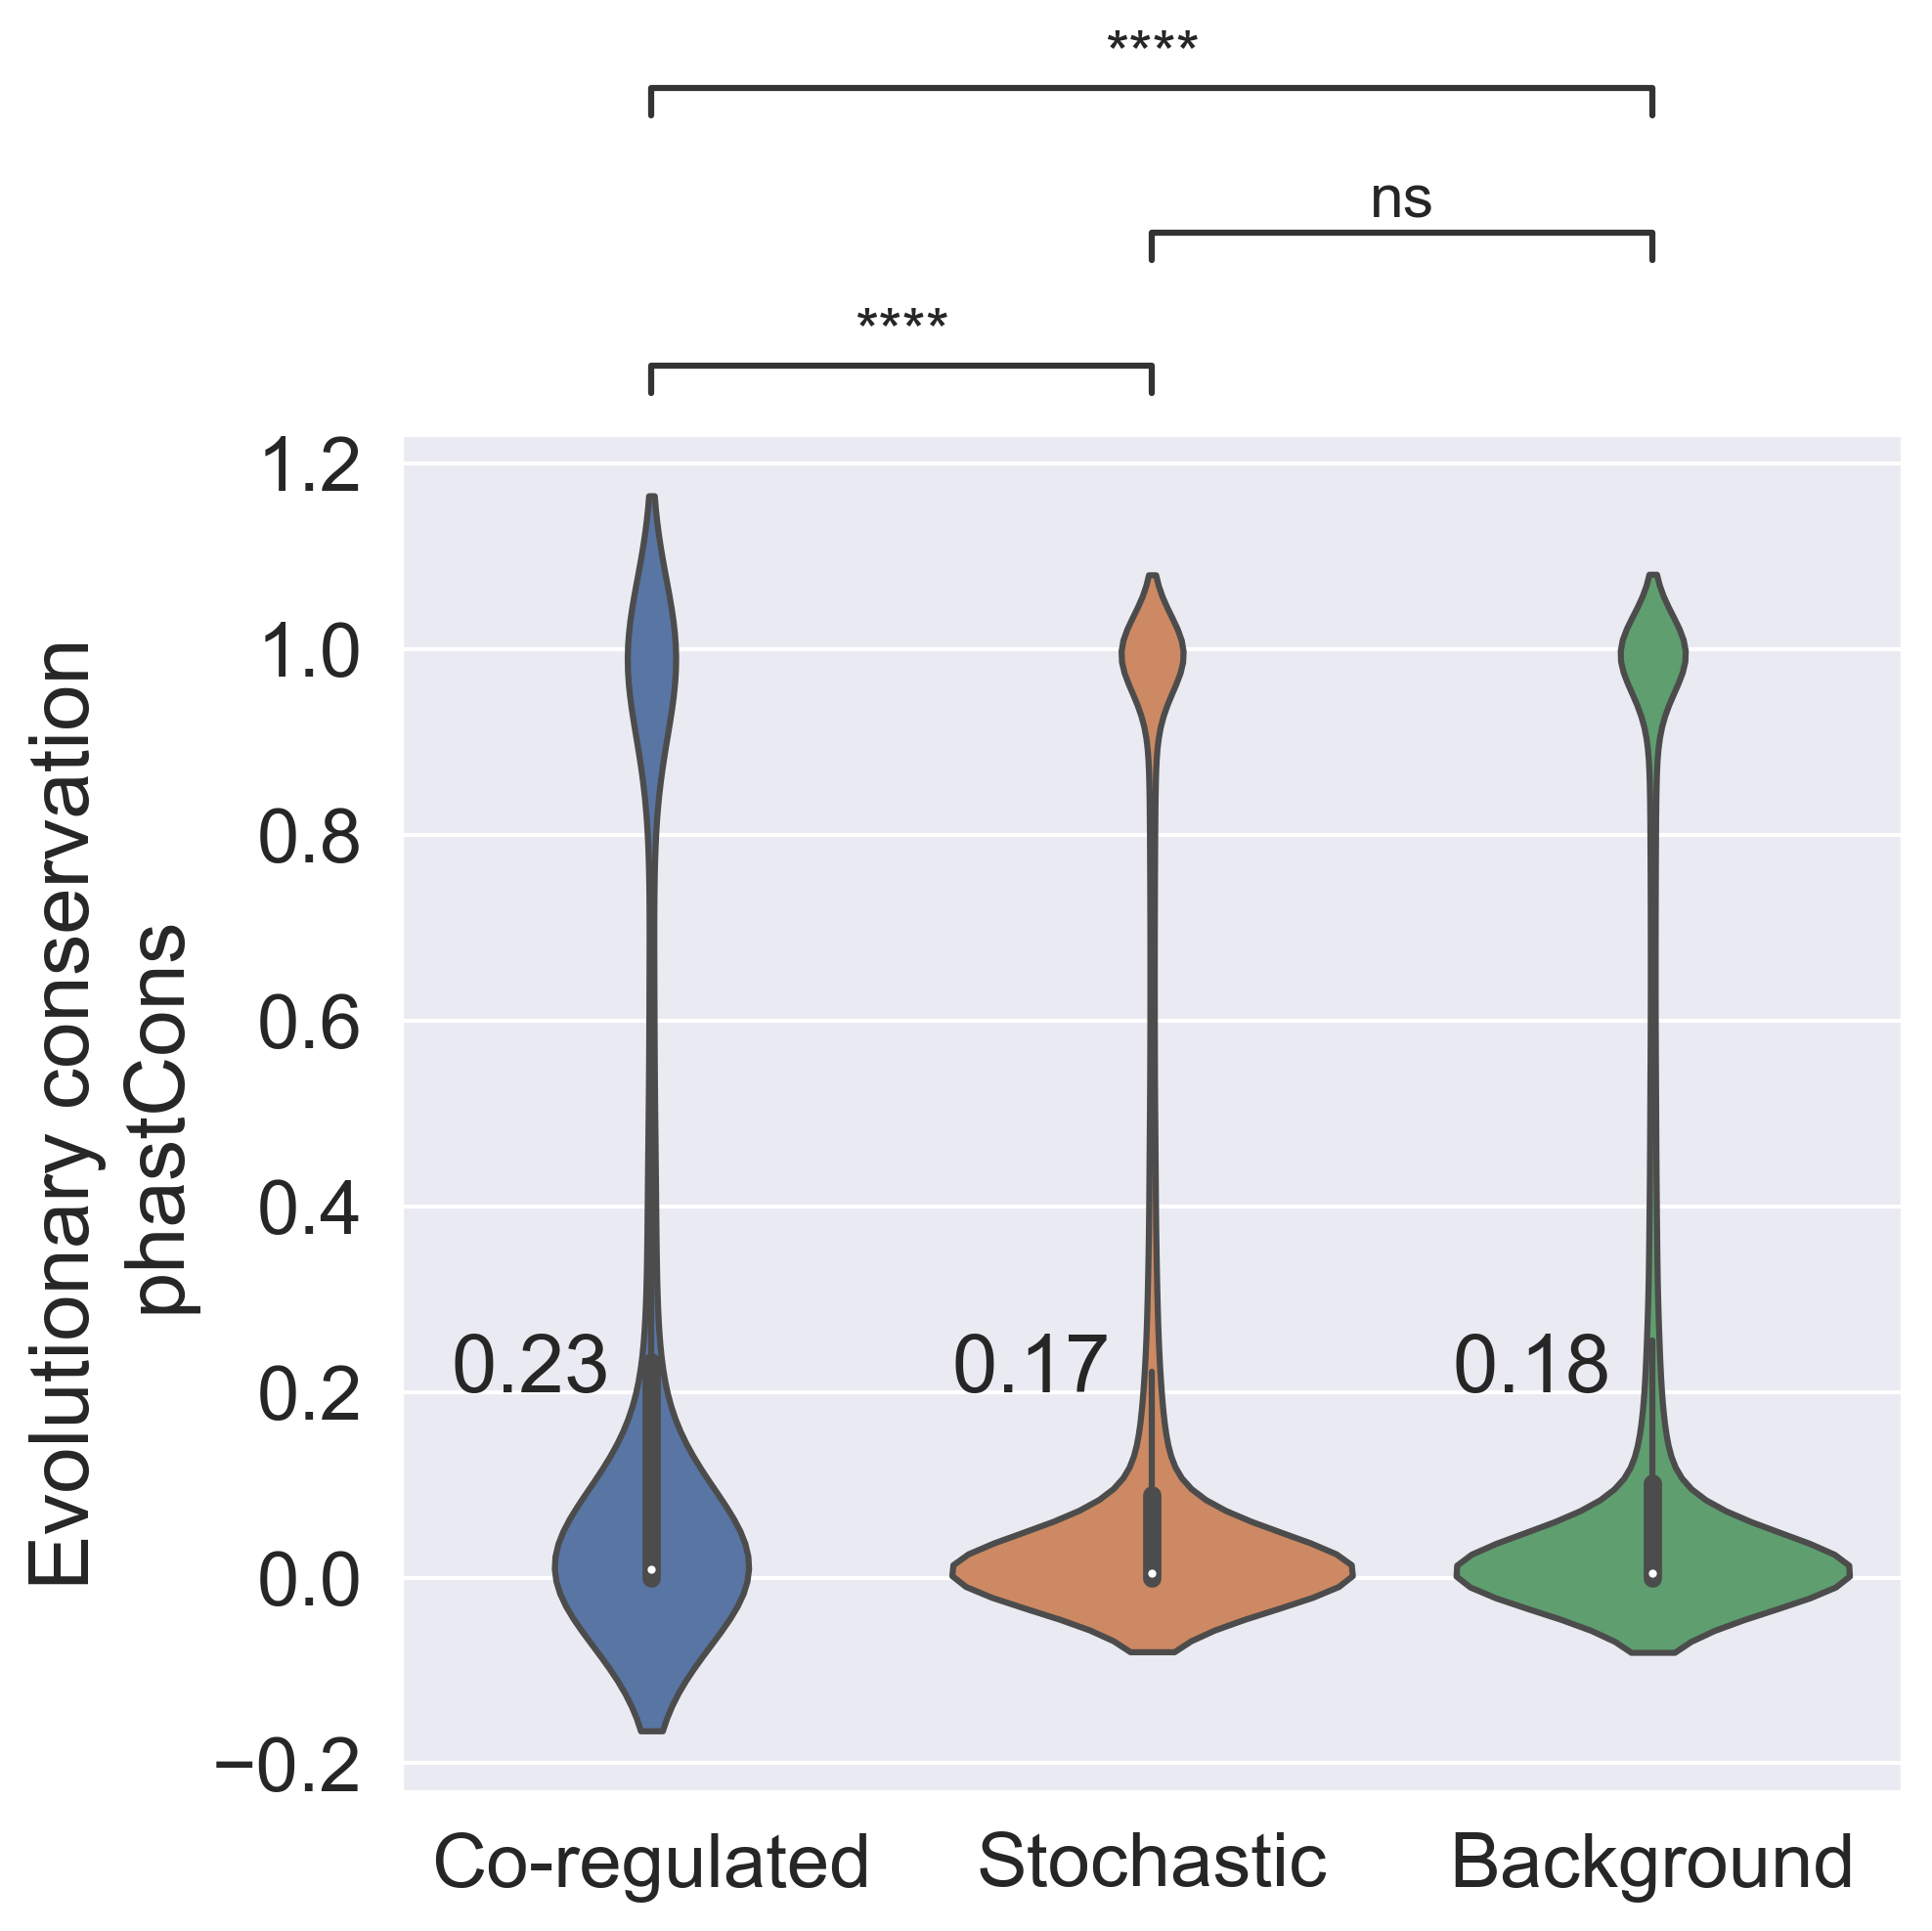

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

sns.set(style="whitegrid")
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.style.use('../Stochastic aging/pics/meth.mplstyle')
plt.figure(figsize=(7,7), dpi=300)

df_ex = sns.load_dataset("tips")
lab2name = {'coreg': 'Co-regulated',
            'stoch': 'Stochastic',
            'rand': 'Background',
            'Background': 'NaN'}

lab2color = {'coreg': '#7fbf7b',
            'stoch': '#af8dc3',
            'rand': '#999999'}
x = "coreg_mark"
# x = "hyper_mark"
# y = "phyloP"
y = "phastCons"

# df[x] = df[x].apply(lambda x: lab2name[x])
sns.set(font_scale = 1.7)
tests = ['Mann-Whitney']#, 't-test_welch', 't-test_paired', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal']
order = ['Co-regulated', 'Stochastic', 'Background']
# order = df[x].unique()
# order = np.setdiff1d(order, ['NaN'])
box_pairs=[(order[x],order[y]) for x in range(0, len(order)) for y in range(x+1, len(order))]

# order = ['Hypermethylated', 'Hypomethylated', 'Background']
box_pairs
for test in tests:
    print(test)
    # try:
    if True:
        for feat in order:
            print(feat)
            print(df[df[x] == feat][y].mean(), df[df[x] == feat][y].std())
        fig, ax = plt.subplots(1,1, figsize=(7,7),dpi=300)
        # ax = sns.stripplot(data=df, x=x, y=y, order=order, palette="Set2", alpha=0.01)
        ax = sns.violinplot(data=df, x=x, y=y, order=order, fontsize=50)#, palette="Set2", alpha=0.01)
        # ax = sns.boxplot(data=df, x=x, y=y, order=order, palette="Set2")
            
        annotator = Annotator(ax, box_pairs, data=df, x=x, y=y, order=order,
                             )
        annotator.configure(test=test, 
                            #test='Wilcoxon-legacy',
                            text_format='star', 
                            # text_format='simple', 
                            loc='outside',
                            verbose=0, #fontsize=10,
                            fontsize=15)
        annotator.apply_and_annotate()
        plt.xlabel(None)
        if y == 'phyloP':
            plt.text(0-0.4,2,'0.43', fontsize=20)
            plt.text(1-0.4,2,'0.22', fontsize=20)
            plt.text(2-0.4,2,'0.24', fontsize=20)
        else:
            plt.text(0-0.4,0.2,'0.23', fontsize=20)
            plt.text(1-0.4,0.2,'0.17', fontsize=20)
            plt.text(2-0.4,0.2,'0.18', fontsize=20)
        plt.ylabel('Evolutionary conservation\nphastCons')
        plt.tight_layout()
        plt.savefig(f'../scDNAm/PICS/png/MWW_coreg_stoch_{x}_{y}_{test}{oldkey}.png', format='png', dpi=300)
        plt.show()
    # except:
    #     continue

Mann-Whitney
Hypermethylated
0.17084495942734537 0.33225809946586055
Hypomethylated
0.17328158204019325 0.3363044194381876
Background
0.1782242128073793 0.3394953263673113


<Figure size 2100x2100 with 0 Axes>

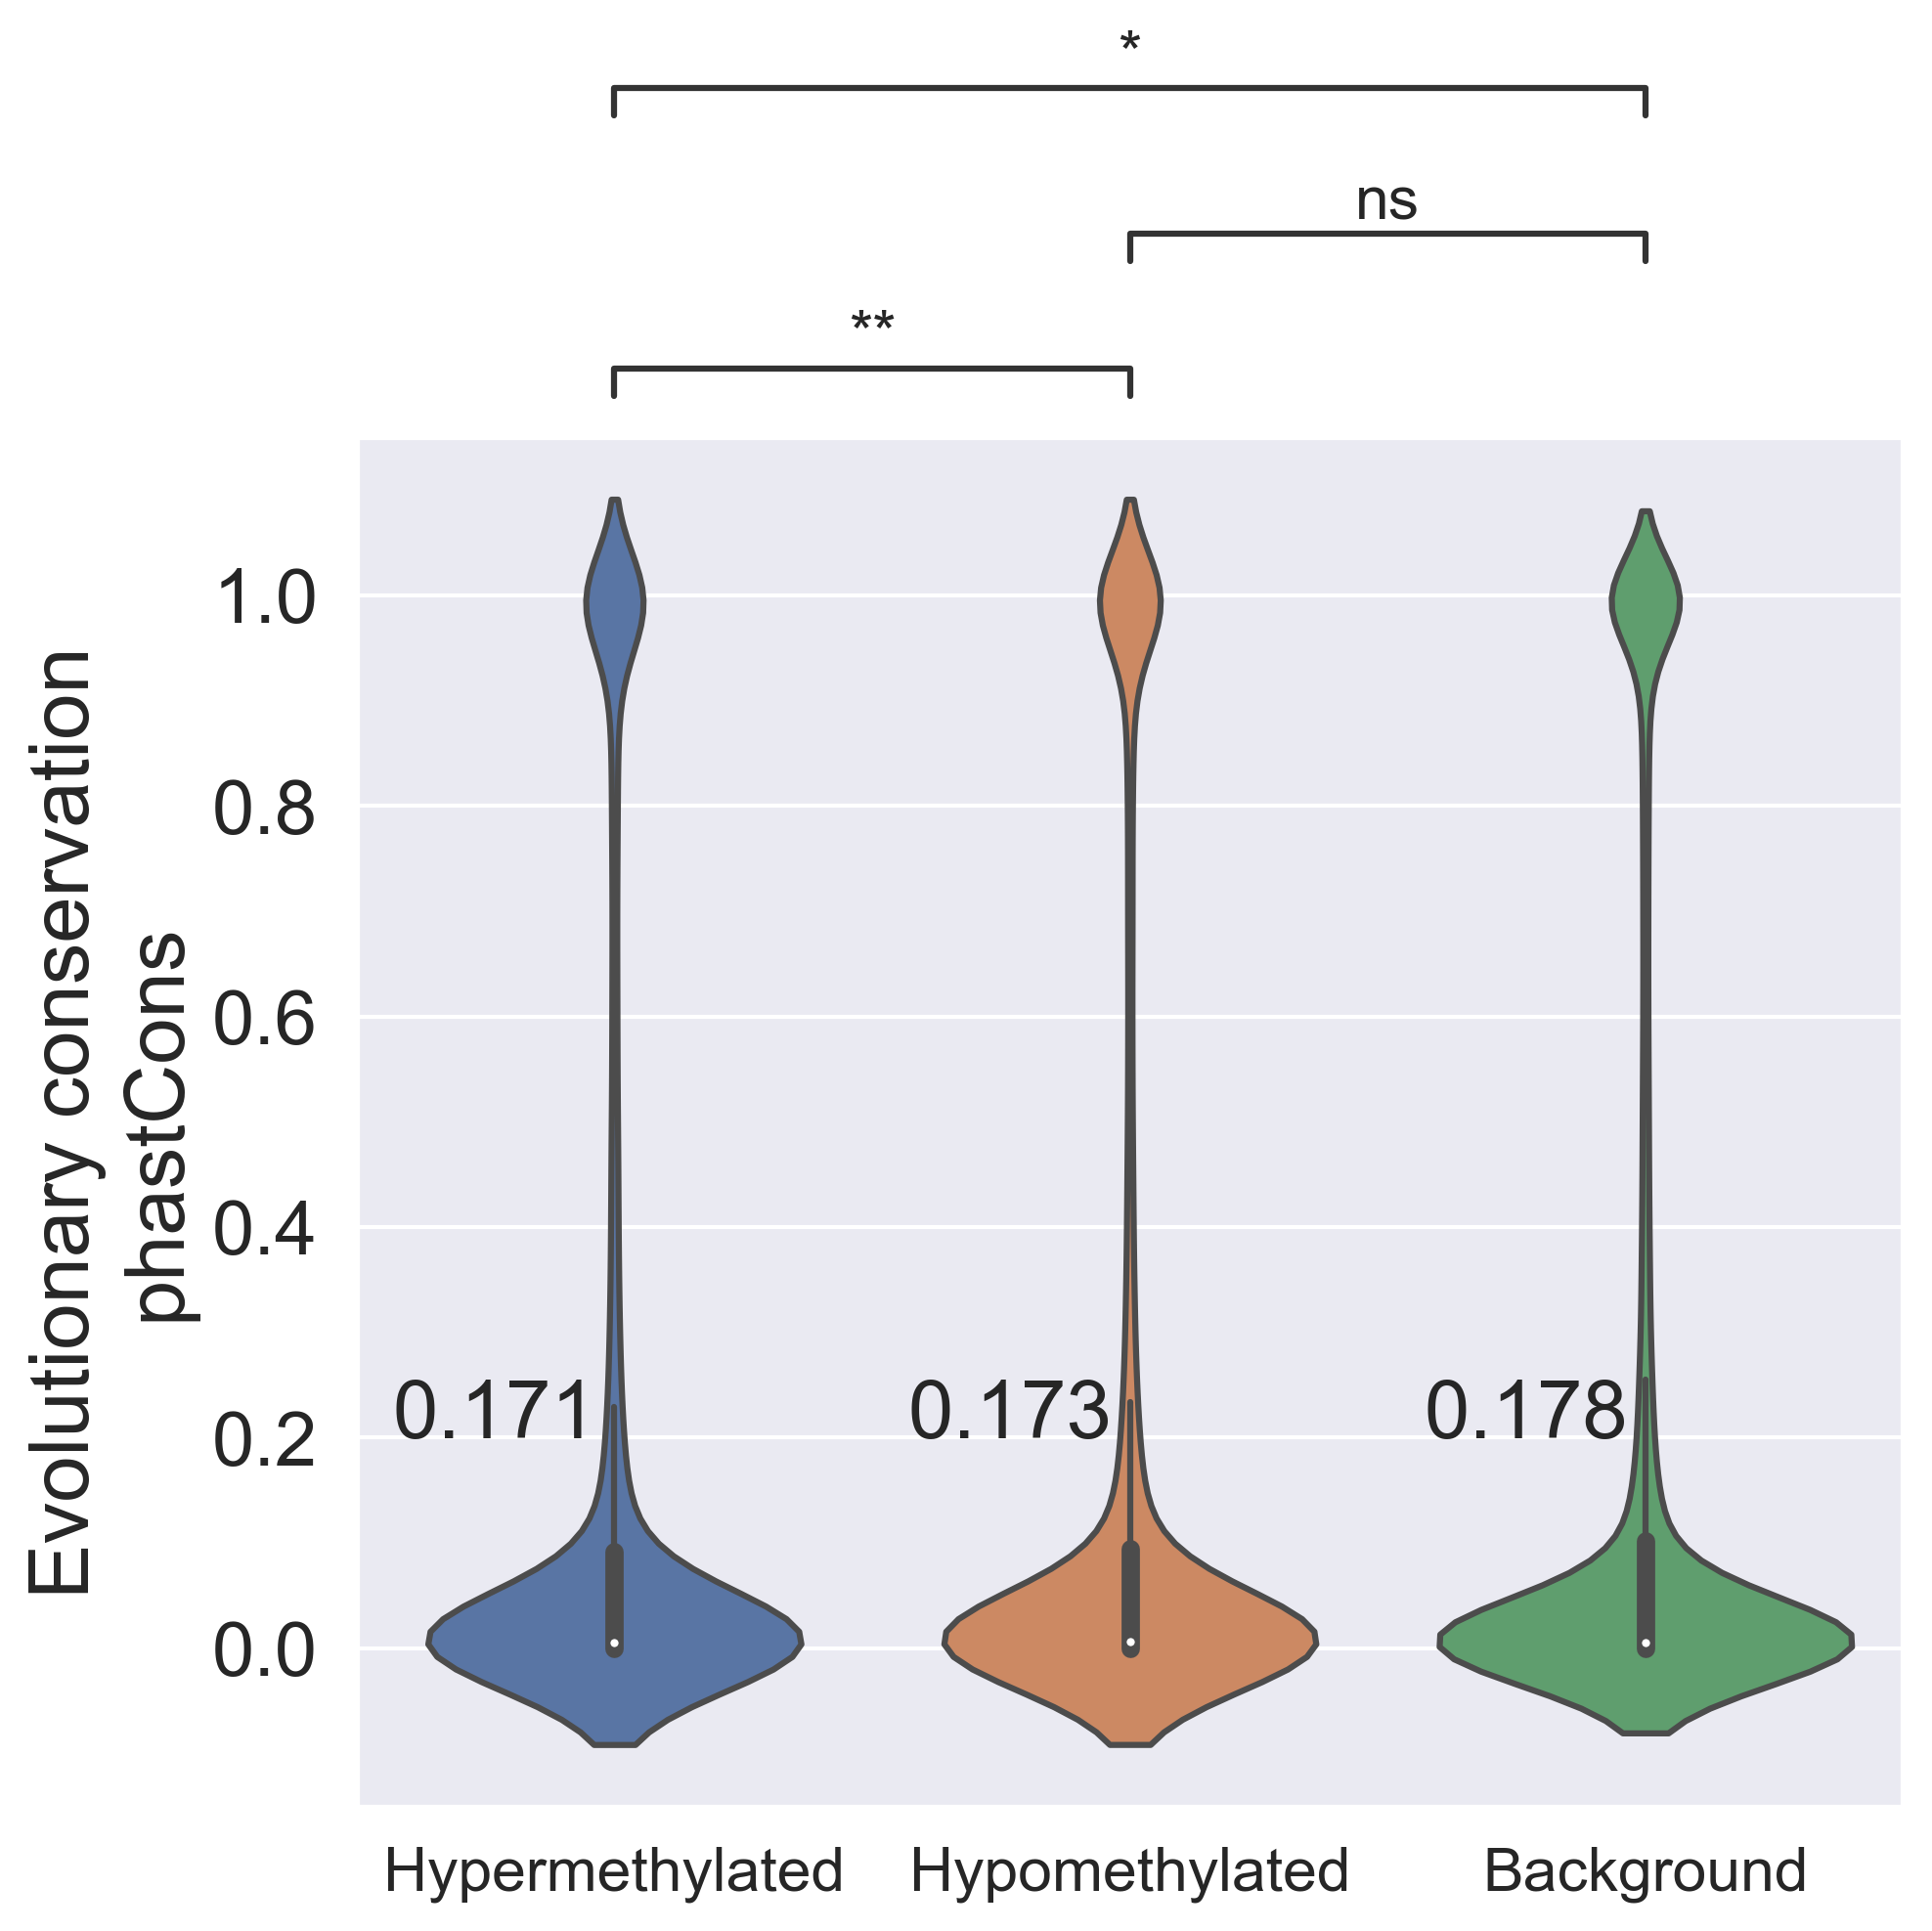

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

sns.set(style="whitegrid")
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.style.use('../Stochastic aging/pics/meth.mplstyle')
plt.figure(figsize=(7,7), dpi=300)

df_ex = sns.load_dataset("tips")
lab2name = {'coreg': 'Co-regulated',
            'stoch': 'Stochastic',
            'rand': 'Background',
            'Background': 'NaN'}

lab2color = {'coreg': '#7fbf7b',
            'stoch': '#af8dc3',
            'rand': '#999999'}
# x = "coreg_mark"
x = "hyper_mark"
# y = "phyloP"
y = "phastCons"

# df[x] = df[x].apply(lambda x: lab2name[x])
sns.set(font_scale = 1.7)
tests = ['Mann-Whitney']#, 't-test_welch', 't-test_paired', 'Mann-Whitney', 'Mann-Whitney-gt', 'Mann-Whitney-ls', 'Levene', 'Wilcoxon', 'Kruskal']
order = ['Hypermethylated', 'Hypomethylated',  'Background']
# order = df[x].unique()
# order = np.setdiff1d(order, ['NaN'])
box_pairs=[(order[x],order[y]) for x in range(0, len(order)) for y in range(x+1, len(order))]

# order = ['Hypermethylated', 'Hypomethylated', 'Background']
box_pairs
for test in tests:
    print(test)
    # try:
    if True:
        for feat in order:
            print(feat)
            print(df[df[x] == feat][y].mean(), df[df[x] == feat][y].std())
        fig, ax = plt.subplots(1,1, figsize=(7,7),dpi=300)
        # ax = sns.stripplot(data=df, x=x, y=y, order=order, palette="Set2", alpha=0.01)
        ax = sns.violinplot(data=df, x=x, y=y, order=order, fontsize=50)#, palette="Set2", alpha=0.01)
        # ax = sns.boxplot(data=df, x=x, y=y, order=order, palette="Set2")
            
        annotator = Annotator(ax, box_pairs, data=df, x=x, y=y, order=order,
                             )
        annotator.configure(test=test, 
                            #test='Wilcoxon-legacy',
                            text_format='star', 
                            # text_format='simple', 
                            loc='outside',
                            verbose=0, #fontsize=10,
                            fontsize=15)
        annotator.apply_and_annotate()
        plt.xlabel(None)
        if y == 'phyloP':
            plt.text(0-0.4,2,'0.43', fontsize=20)
            plt.text(1-0.4,2,'0.22', fontsize=20)
            plt.text(2-0.4,2,'0.24', fontsize=20)
        else:
            plt.text(0-0.43,0.2,'0.171', fontsize=20)
            plt.text(1-0.43,0.2,'0.173', fontsize=20)
            plt.text(2-0.43,0.2,'0.178', fontsize=20)
        plt.xticks(fontsize=15)
        plt.ylabel('Evolutionary conservation\nphastCons')
        plt.tight_layout()
        plt.savefig(f'../scDNAm/PICS/png/MWW_hyper_hypo_{x}_{y}_{test}{oldkey}.png', format='png', dpi=300)
        plt.show()
    # except:
    #     continue

# TF bindings

In [581]:
df = pd.read_csv('../scDNAm/andrei/cgi_tfs.csv', index_col=0)
df.head()

,hypermethylated_with_age,hypomethylated_with_age,co_regulated_cluster,stochastic_cluster,hg19_pos,hg38_pos,hg19_pos_full,hg38_pos_full,mm10_pos_full,ch,...,NCOA1,ZKSCAN1,ZNF274,NFXL1,BCL11A,MCM7,CBX3,ZNF217,SMARCE1,CHD4
mm10_pos,,,,,,,,,,,,,,,,,,,,,
chr10_100025890,True,False,False,True,chr12_88964110,chr12_88570333,chr12:88964110-88964111,chr12:88570333-88570334,chr10:100025890-100025891,12,...,0,0,0,0,0,0,0,0,0,0
chr10_100025896,True,False,False,True,chr12_88964104,chr12_88570327,chr12:88964104-88964105,chr12:88570327-88570328,chr10:100025896-100025897,12,...,0,0,0,0,0,0,0,0,0,0
chr10_100128461,Background,Background,Background,True,chr12_88842302,chr12_88448525,chr12:88842302-88842303,chr12:88448525-88448526,chr10:100128461-100128462,12,...,0,0,0,0,0,0,0,0,0,0
chr10_100520117,True,False,False,True,None,chr4_3599240,None,chr4:3599240-3599241,chr10:100520117-100520118,4,...,0,0,0,0,0,0,0,0,0,0
chr10_10061828,Background,Background,Background,True,chr6_147399625,chr6_147078489,chr6:147399625-147399626,chr6:147078489-147078490,chr10:10061828-10061829,6,...,0,0,0,0,0,0,0,0,0,0


In [586]:
tfs = df.columns[-122:].values

In [587]:
features = ['hypermethylated_with_age', 'hypomethylated_with_age','stochastic_cluster',  'co_regulated_cluster']#, 'random_subset']
for feat in features:
    print(df[feat].value_counts())
    print(np.sum(df[feat].values == 'True'))

Background    25127
True          11927
False         11912
Name: hypermethylated_with_age, dtype: int64
11927
Background    25127
False         11927
True          11912
Name: hypomethylated_with_age, dtype: int64
11912
True     46764
False     2202
Name: stochastic_cluster, dtype: int64
0
Background    25127
False         22600
True           1239
Name: co_regulated_cluster, dtype: int64
1239


/var/folders/v_/gtsrj3xs0_131ltxwg51r_f40000gn/T/ipykernel_5841/3295914747.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  print(np.sum(df[feat].values == 'True'))


In [631]:
from scipy.stats import fisher_exact
tab = np.zeros((2,2))
res = np.zeros((len(features), len(tfs), 2))
val_from = ['True'] # ['False']
# val_to = ['Background', 'False']
val_to = ['Background']
# val_to = ['False']
# val_to = 'False'
for i, feat in enumerate(features):
    for j, tf in enumerate(tfs):
        tab[0,0] = np.sum(np.logical_and(df[feat].isin(val_from), df[tf].values > 0))
        tab[0,1] = np.sum(np.logical_and(df[feat].isin(val_to), df[tf].values > 0))
        tab[1,0] = np.sum(np.logical_and(df[feat].isin(val_from), df[tf].values == 0))
        tab[1,1] = np.sum(np.logical_and(df[feat].isin(val_to), df[tf].values == 0))
        res[i,j, 0], res[i,j,1] = fisher_exact(tab)

In [632]:
df.co_regulated_cluster.value_counts()

Background    25127
False         22600
True           1239
Name: co_regulated_cluster, dtype: int64

In [633]:
for i, feat in enumerate(features):
    print(feat)
    print(list(zip((tfs[res[i,:,1] < 0.05/len(tfs)], res[i,:,0][res[i,:,1] < 0.05/len(tfs)], res[i,:,1][res[i,:,1] < 0.05/len(tfs)]))))
    print()

hypermethylated_with_age
[(array([], dtype=object),), (array([], dtype=float64),), (array([], dtype=float64),)]

hypomethylated_with_age
[(array(['Island', 'HDAC1', 'HDAC2', 'EGR1', 'CTCF', 'POLR2A', 'TAF1',
       'SMC3', 'RAD21', 'SIN3A', 'EZH2', 'SP1', 'ZFX', 'ASH2L', 'MAX',
       'MYC', 'NRF1', 'YY1', 'PHF8', 'MXI1', 'TRIM22'], dtype=object),), (array([0.50085956, 0.39610234, 0.28052661, 0.38521365, 0.70002887,
       0.48538449, 0.288257  , 0.48040574, 0.57705869, 0.34044652,
       0.23145519, 0.44854363, 0.25757379, 0.23093686, 0.39886559,
       0.54546846, 0.35722625, 0.37562767, 0.38788234, 0.31086168,
       0.11917735]),), (array([4.29327839e-56, 3.11853941e-06, 3.23058421e-06, 3.74996169e-06,
       2.30761545e-08, 1.65060797e-25, 2.25935583e-11, 1.98540911e-04,
       1.78999596e-04, 2.34878685e-14, 7.96130286e-48, 6.74918767e-07,
       2.84467112e-11, 8.13209299e-07, 1.75656498e-08, 1.01498173e-04,
       1.11149158e-05, 1.36186158e-05, 3.29808334e-09, 1.41915318e-05,


In [634]:
features
feat2name = {'hypermethylated_with_age': 'Hypermethylated',
 'hypomethylated_with_age': 'Hypomethylated',
 'stochastic_cluster': 'Stochastic',
 'co_regulated_cluster': 'Co-regulated',
 'random_subset': 'Background'}

feat2nameVS = {'hypermethylated_with_age': 'Hyper- vs\n Hypo-methylated',
 'hypomethylated_with_age': 'Hypomethylated vs Hypermethylated',
 'stochastic_cluster': 'Stochastic',
 'co_regulated_cluster': 'Co-regulated vs\n Stochastic',
'random_subset': 'random_subset'}

# Fig. 6e

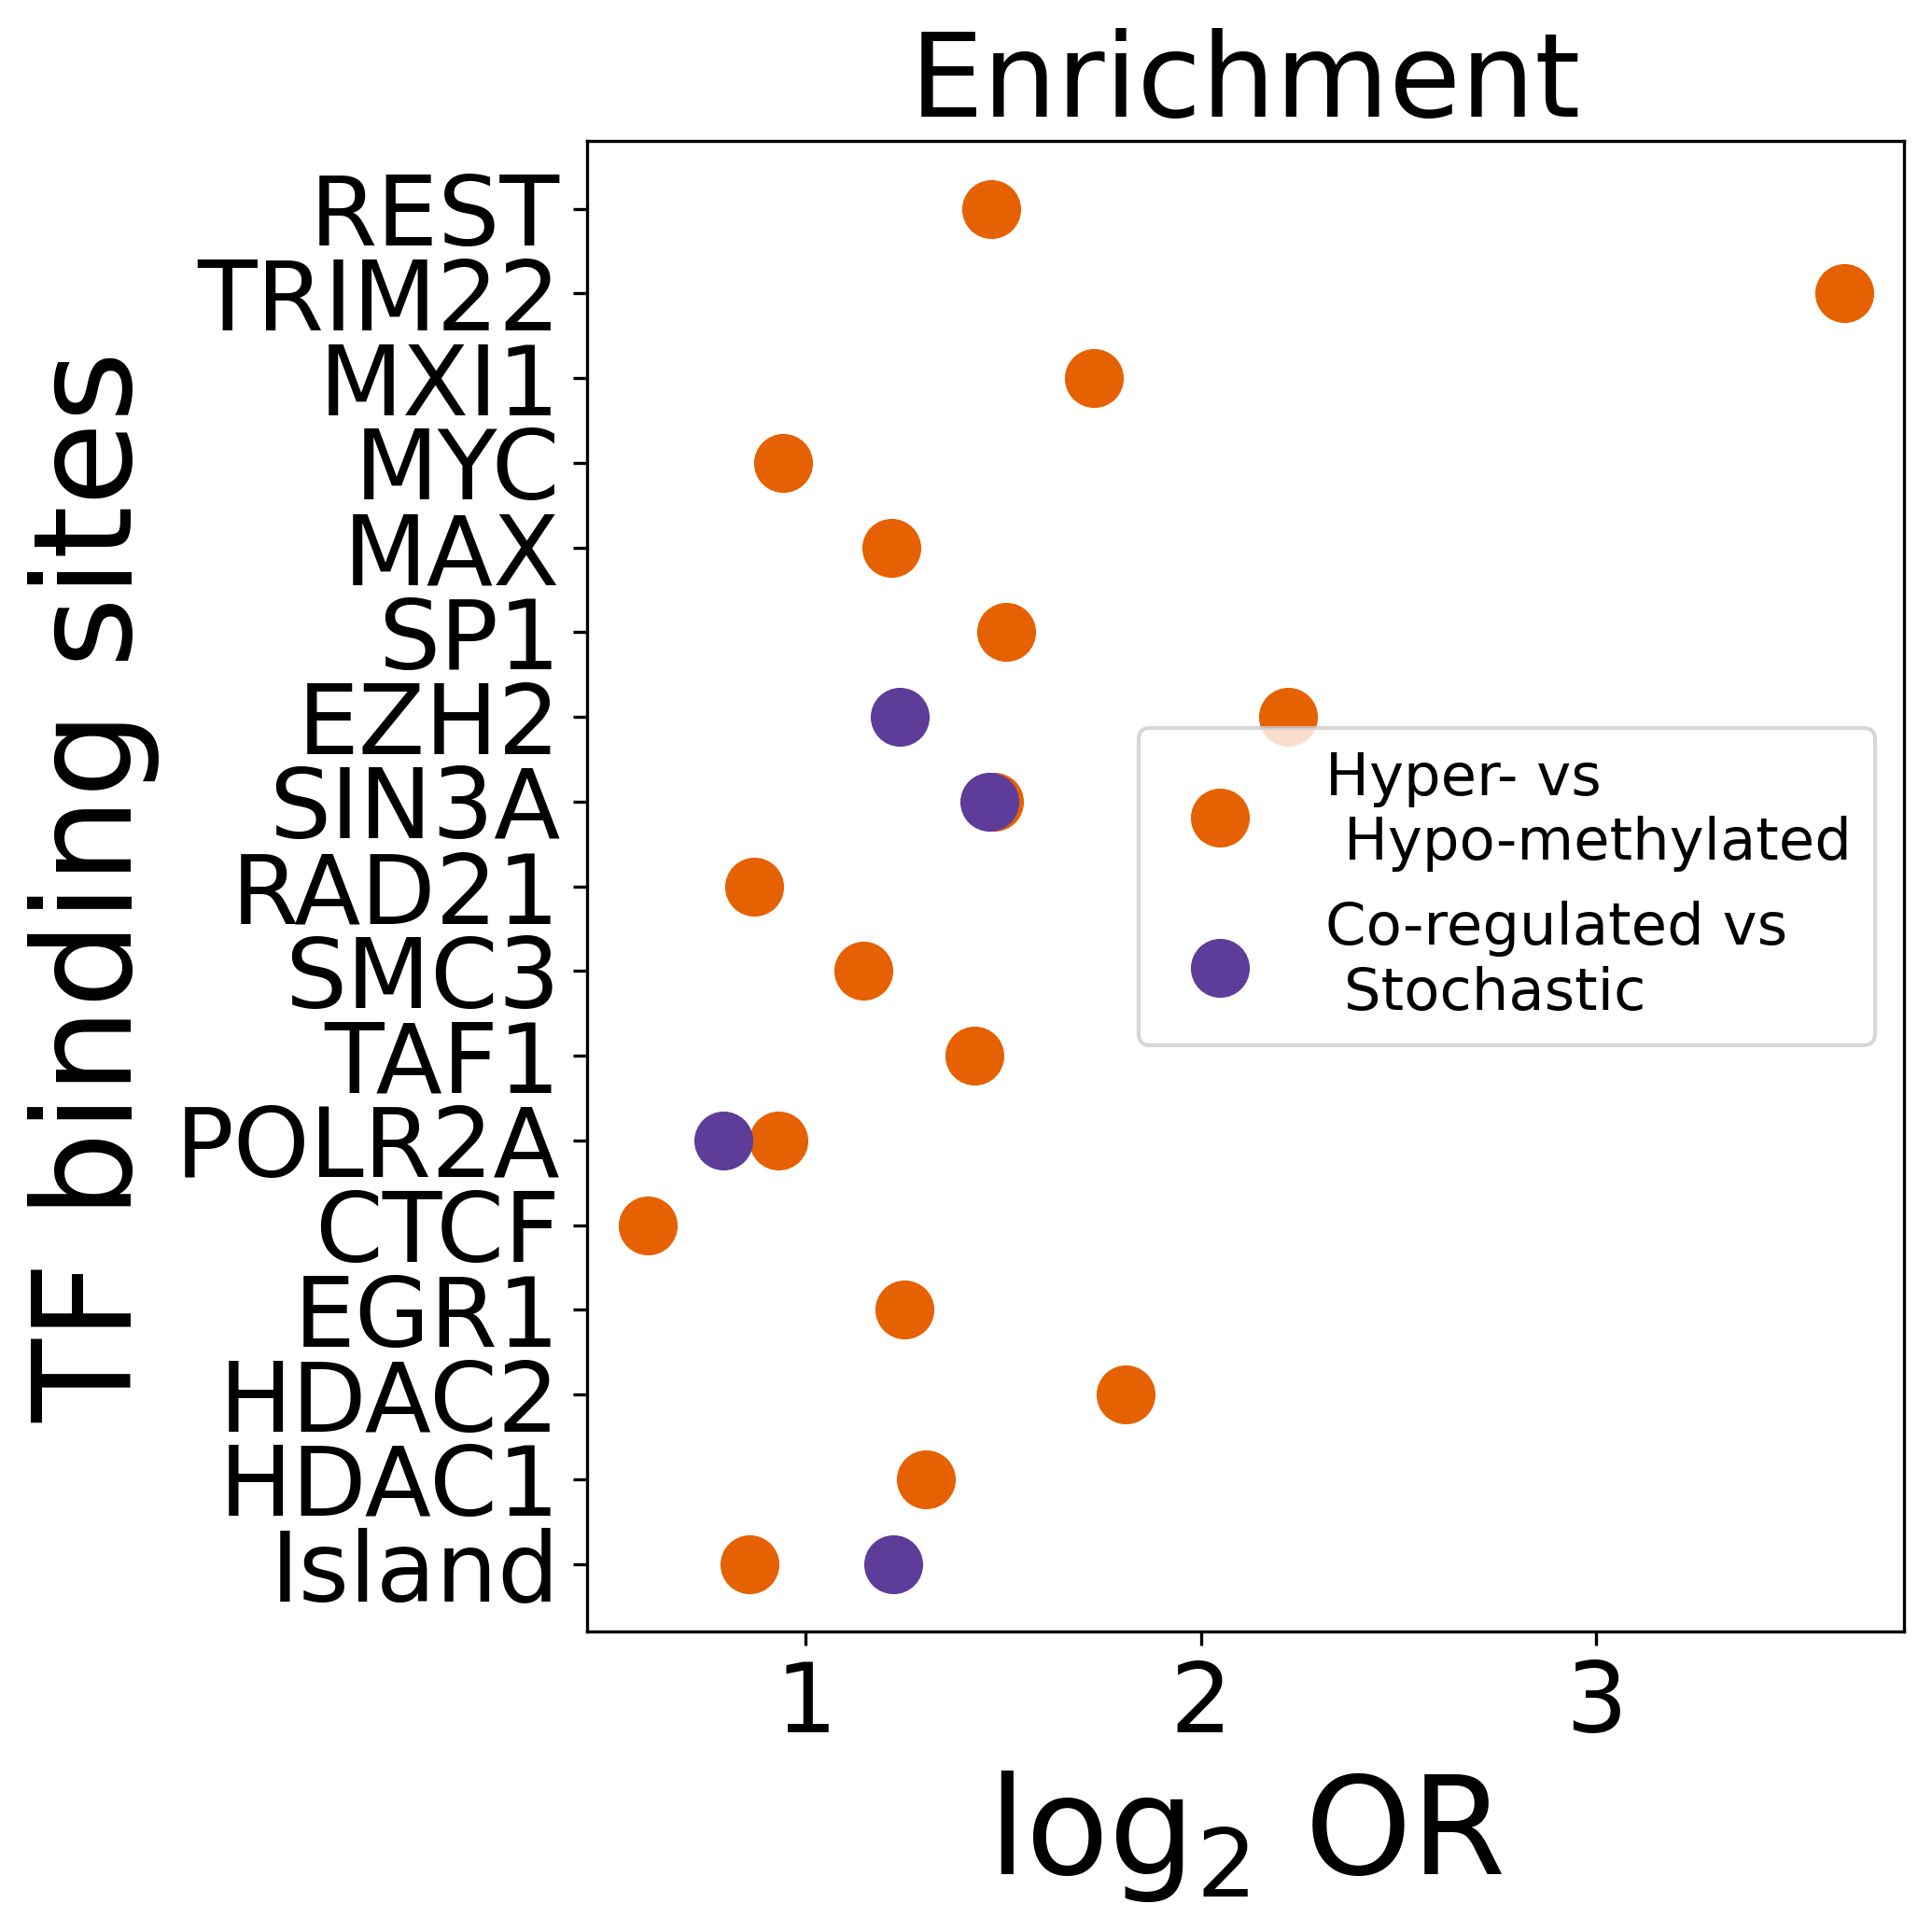

In [630]:
plt.style.use('../Stochastic aging/pics/meth.mplstyle')
enr_colors = ['#e66101', '#fdb863','#b2abd2', '#5e3c99', 'yellow']
fig, ax = plt.subplots(1,1, dpi=300, figsize=(7,7))
for i, feat in enumerate(features):
    if i in [1,2]:
        continue
    df_enr = pd.DataFrame(res[i,:,:], columns=['OR', 'p-value'], index=tfs)
    df_enr.reset_index(inplace=True)
    df_enr = df_enr[df_enr['p-value'] < 0.05 / len(tfs)]
    df_enr['log OR'] = np.log2(df_enr['OR'])
    
    plt.scatter(df_enr['log OR'], df_enr['index'], color=enr_colors[i], s=200, label=feat2nameVS[feat])
plt.title('Enrichment')
plt.xlabel(r'$\log_2$ OR', fontsize=35)
plt.ylabel(r'TF binding sites', fontsize=35)
plt.legend(loc='center right', frameon=True,fontsize=15)
plt.tight_layout()
plt.savefig(f'../scDNAm/PICS/png/TFbinding_vs_each_other.png', format='png', dpi=300)
plt.show()

/var/folders/v_/gtsrj3xs0_131ltxwg51r_f40000gn/T/ipykernel_5841/1758681951.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.scatter(df_enr['log OR'], df_enr['index'], color=enr_colors[i], s=200, label=feat2name[feat])


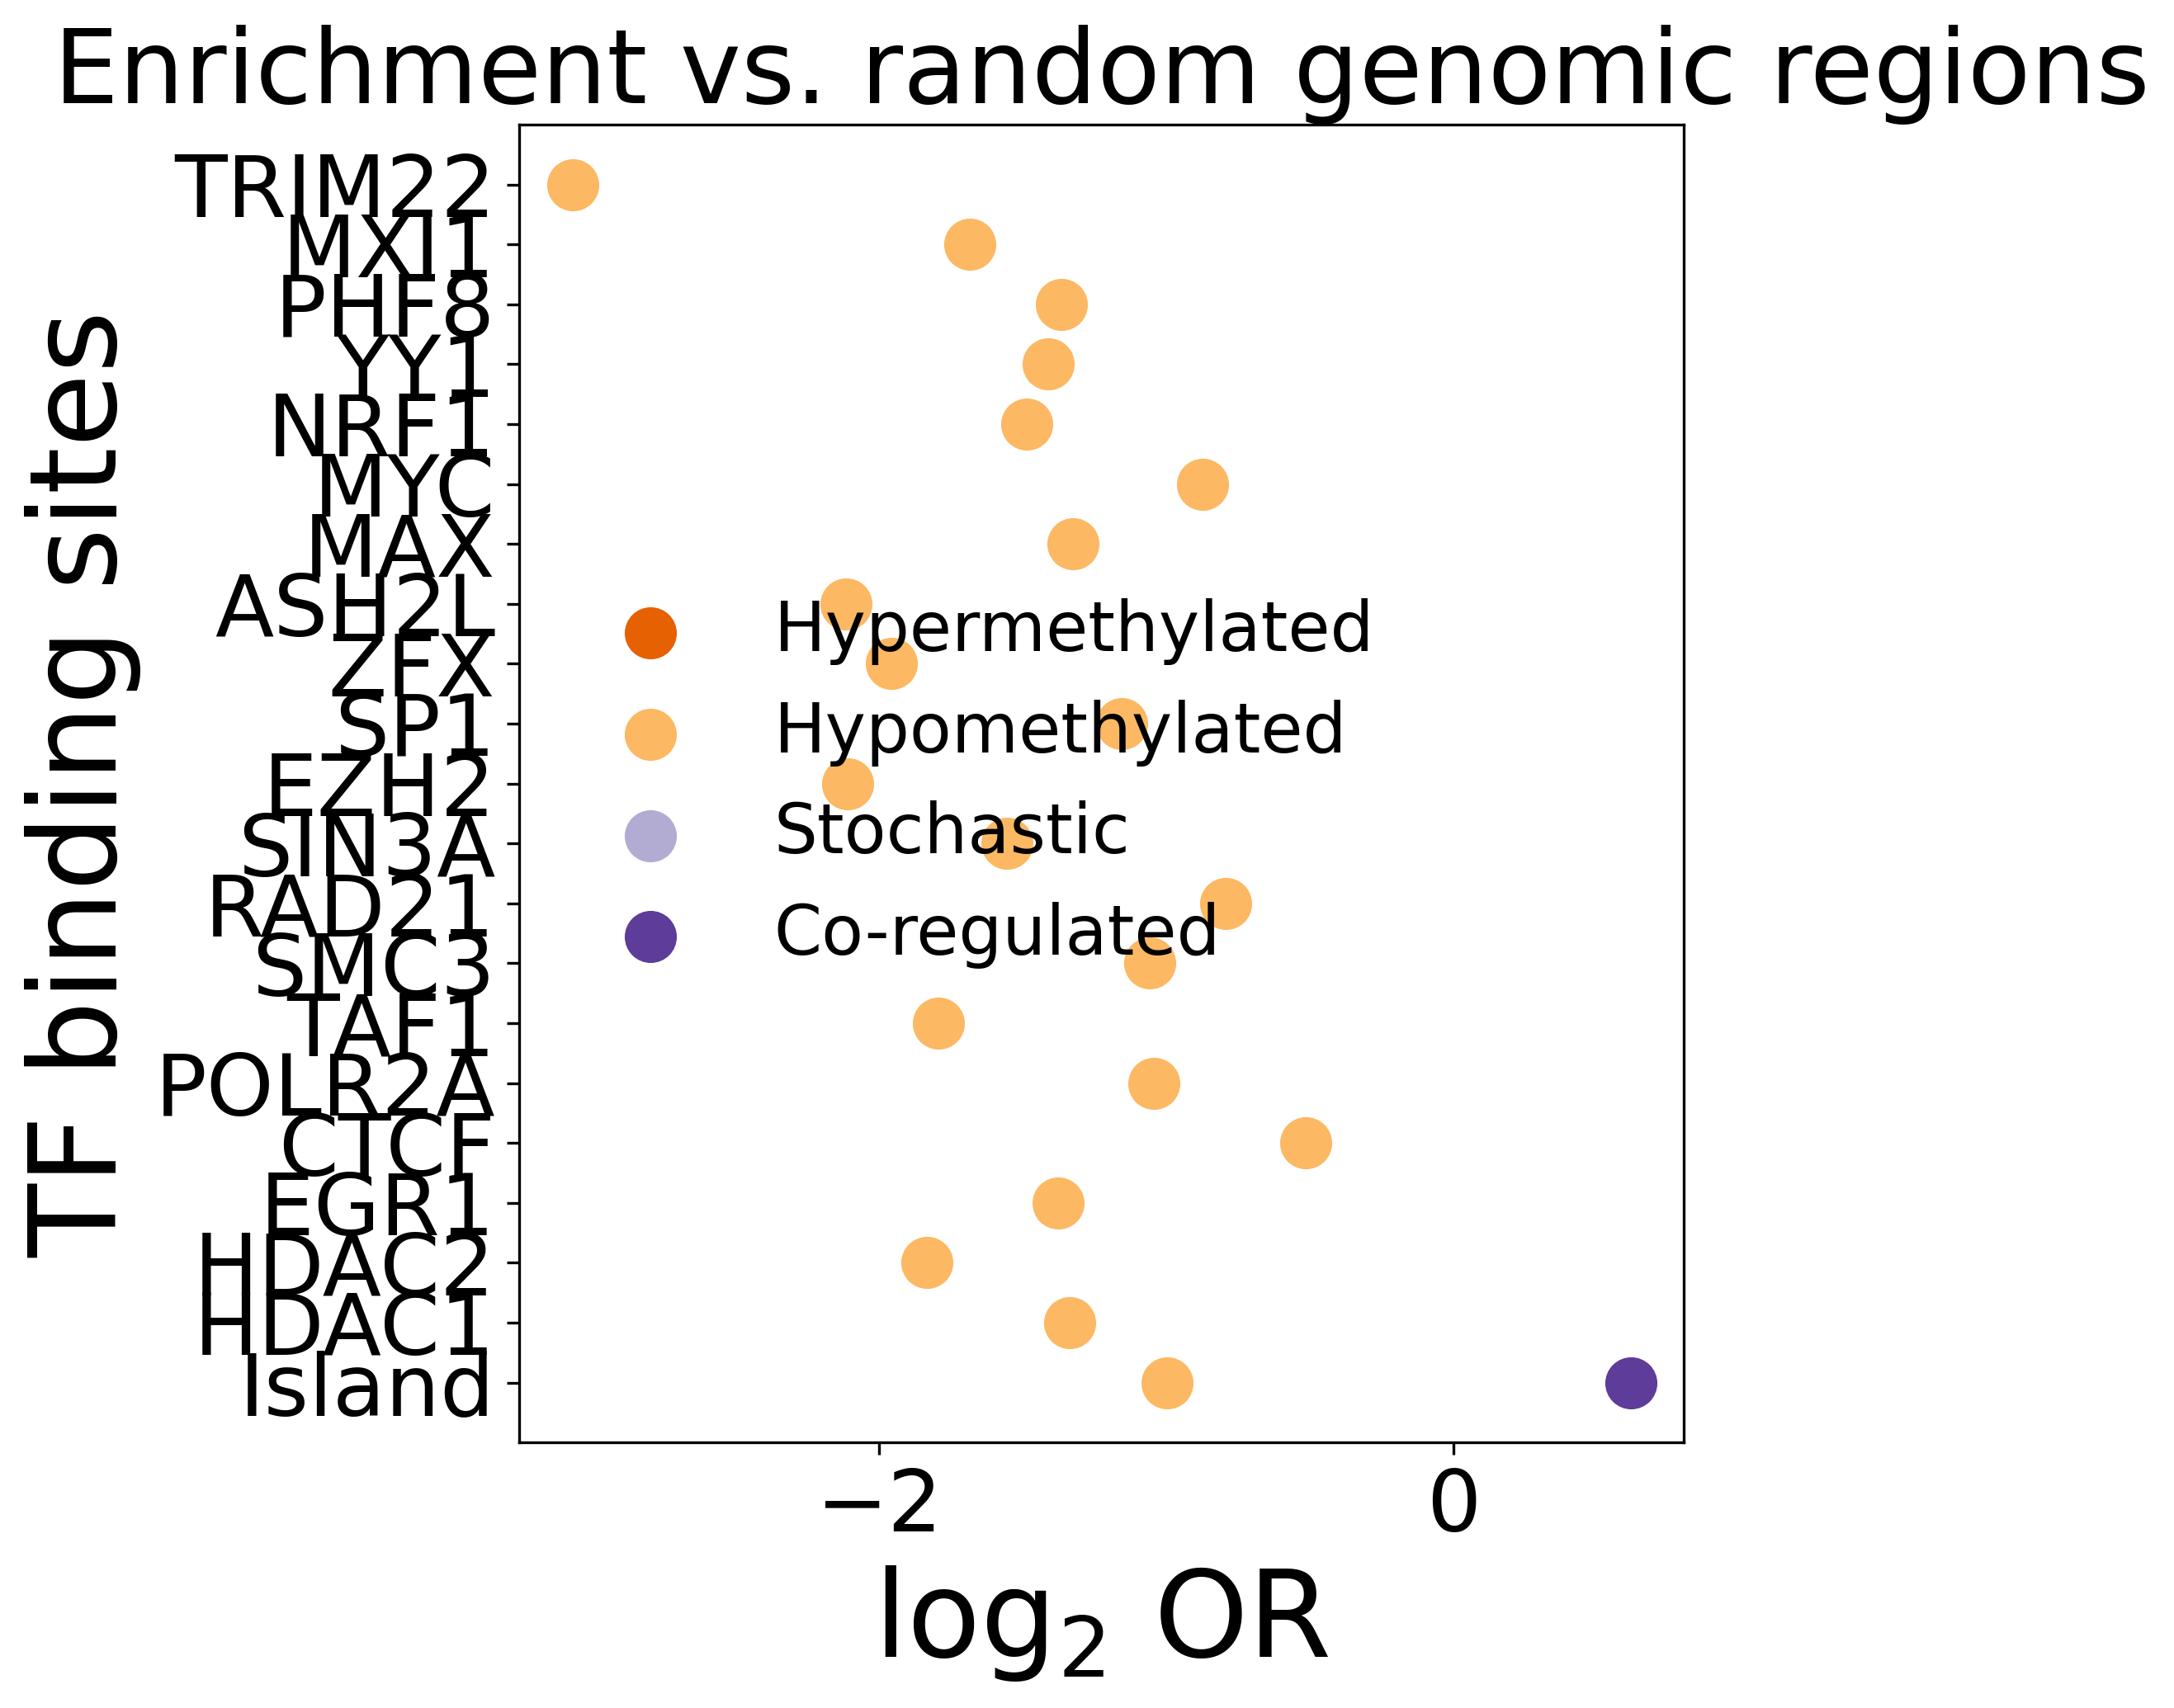

In [635]:
plt.style.use('../Stochastic aging/pics/meth.mplstyle')
enr_colors = ['#e66101', '#fdb863','#b2abd2', '#5e3c99', 'yellow']
fig, ax = plt.subplots(1,1, dpi=300, figsize=(7,7))
for i, feat in enumerate(features):
    df_enr = pd.DataFrame(res[i,:,:], columns=['OR', 'p-value'], index=tfs)
    df_enr.reset_index(inplace=True)
    df_enr = df_enr[df_enr['p-value'] < 0.05 / len(tfs)]
    df_enr['log OR'] = np.log2(df_enr['OR'])
    # df_enr['log OR'] = df_enr['OR']
    
    plt.scatter(df_enr['log OR'], df_enr['index'], color=enr_colors[i], s=200, label=feat2name[feat])
    # ax = sns.pointplot(
    #     data=df_enr, x="log OR", y="index", 
    #     errorbar=("pi", 100), capsize=.1, 
    #     join=False, color=None, ax=ax
    # )
plt.title('Enrichment vs. random genomic regions')
# plt.xticks([-4,-3,-2,-1,0])
plt.xlabel(r'$\log_2$ OR', fontsize=35)
plt.ylabel(r'TF binding sites', fontsize=35)
plt.legend(loc='center left')
plt.tight_layout()
plt.savefig(f'../scDNAm/PICS/png/TFbinding_vs_random.png', format='png', dpi=300)
plt.show()

# Fig. 6d

In [ ]:
from scipy.stats import fisher_exact
tab = np.zeros((2,2))
features = ['hypermethylated_with_age', 'hypomethylated_with_age','stochastic_cluster',  'co_regulated_cluster']
tfs = np.array(['Island'])
res = np.zeros((len(features), len(tfs), 2))
for i, feat in enumerate(features):
    for j, tf in enumerate(tfs):
        tab[0,0] = np.sum(np.logical_and(df[feat].values == 'True', df[tf].values > 0))
        tab[0,1] = np.sum(np.logical_and(df[feat].values == 'Background', df[tf].values > 0))
        tab[1,0] = np.sum(np.logical_and(df[feat].values == 'True', df[tf].values == 0))
        tab[1,1] = np.sum(np.logical_and(df[feat].values == 'Background', df[tf].values == 0))
        res[i, j, 0], res[i,j,1] = fisher_exact(tab)

In [ ]:
print('hypermeth')
tab = [[79,11983],
       [30290,3702659]]
print(fisher_exact(tab))
print('hypometh')
tab = [[97,11974],
       [30290,3702659]]
print(fisher_exact(tab))
print('coreg')
tab = [[91,12288],
       [30290,3702659]]
print(fisher_exact(tab))
print('stoch')
tab = [[86,11669],
       [30290,3702659]]
print(fisher_exact(tab))

print('hypermeth')

tab = [[411,11983],
       [146195,3702659]]
print(fisher_exact(tab))
print('hypometh')

tab = [[443,11974],
       [146195,3702659]]
print(fisher_exact(tab))
print('coreg')

tab = [[488,12288],
       [146195,3702659]]
print(fisher_exact(tab))
print('stoch')

tab = [[366,11669],
       [146195,3702659]]
print(fisher_exact(tab))


hypermeth
(0.8058903877444736, 0.059610837890829056)
hypometh
(0.9902547271040595, 1.0)
coreg
(0.9052627148716917, 0.3664023904840336)
stoch
(0.9009055350652267, 0.3541501735715096)
hypermeth
(0.8686752742850928, 0.004719746348080816)
hypometh
(0.9370131157265951, 0.18784621831028037)
coreg
(1.0058189573785583, 0.8893886964272932)
stoch
(0.794380624835101, 8.721522537268815e-06)


In [ ]:
print('hypermeth')
tab = [[3,77],
       [1146,96940]]
print(fisher_exact(tab))
print('hypometh')
tab = [[0,26],
       [1146,96940]]
print(fisher_exact(tab))
print('coreg')
tab = [[0,8],
       [1146,96940]]
print(fisher_exact(tab))
print('stoch')
tab = [[3,95],
       [1146,96940]]
print(fisher_exact(tab))


print('hypermeth')

tab = [[5,77],
       [3716,96940]]
print(fisher_exact(tab))
print('hypometh')

tab = [[2,26],
       [3716,96940]]
print(fisher_exact(tab))
print('coreg')

tab = [[0,8],
       [3716,96940]]
print(fisher_exact(tab))
print('stoch')

tab = [[7,95],
       [3716,96940]]
print(fisher_exact(tab))

hypermeth
(3.2957095260760183, 0.06782228516559151)
hypometh
(0.0, 1.0)
coreg
(0.0, 1.0)
stoch
(2.671259300082667, 0.10805037719939378)
hypermeth
(1.6939734108733033, 0.2320070600878152)
hypometh
(2.006706963649913, 0.27692983552807193)
coreg
(0.0, 1.0)
stoch
(1.9222140388646536, 0.10547988675736586)


In [ ]:
print('hypermeth')
tab = [[133,24514],
       [32487,5999944]]
print(fisher_exact(tab))
print('hypometh')
tab = [[156,27381],
       [32487,5999944]]
print(fisher_exact(tab))
print('coreg')
tab = [[20,3975],
       [32487,5999944]]
print(fisher_exact(tab))
print('stoch')
tab = [[269,47920],
       [32487,5999944]]
print(fisher_exact(tab))


print('hypermeth')

tab = [[276,24514],
       [71491,5999944]]
print(fisher_exact(tab))
print('hypometh')

tab = [[352,27381],
       [71491,5999944]]
print(fisher_exact(tab))
print('coreg')

tab = [[45,3975],
       [71491,5999944]]
print(fisher_exact(tab))
print('stoch')

tab = [[583,47920],
       [71491,5999944]]
print(fisher_exact(tab))

# 276
# 352
# 45
# 583



hypermeth
(1.0020169030578447, 0.9652061844547257)
hypometh
(1.0522353348044597, 0.5091662876201788)
coreg
(0.9292454669337498, 0.8290397337804223)
stoch
(1.0367476488476475, 0.5526851842452927)
hypermeth
(0.9449106095778287, 0.3759729851939901)
hypometh
(1.0789198498063548, 0.1630017920041626)
coreg
(0.9501041297453195, 0.8260956313539345)
stoch
(1.0210513183430936, 0.6120686191165561)


In [ ]:
print('hypermeth')
tab = [[133,24514],
       [584,103791]]
print(fisher_exact(tab))
print('hypometh')
tab = [[156,27381],
       [584,103791]]
print(fisher_exact(tab))
print('coreg')
tab = [[41,8431],
       [584,103791]]
print(fisher_exact(tab))
print('stoch')
tab = [[248,43464],
       [584,103791]]
print(fisher_exact(tab))


print('hypermeth')

tab = [[276,24514],
       [1262,103791]]
print(fisher_exact(tab))
print('hypometh')

tab = [[352,27381],
       [1262,103791]]
print(fisher_exact(tab))
print('coreg')

tab = [[89,8431],
       [1262,103791]]
print(fisher_exact(tab))
print('stoch')

tab = [[539,43464],
       [1262,103791]]
print(fisher_exact(tab))

# 276
# 352
# 45
# 583



hypermeth
(0.9642381457171244, 0.738886671414213)
hypometh
(1.012563206262917, 0.8917787182648704)
coreg
(0.8642743349315881, 0.40266290059529586)
stoch
(1.014072108802372, 0.848941891553972)
hypermeth
(0.925966429222436, 0.26712780152232)
hypometh
(1.057288965343245, 0.3554910169806126)
coreg
(0.8681829622435202, 0.21239446408371282)
stoch
(1.0199042805850145, 0.6967725227734834)


# TH = 0.4

In [ ]:
print('hypermeth')
tab = [[133,24514],
       [584,103791]]
print(fisher_exact(tab))
print('hypometh')
tab = [[156,27381],
       [584,103791]]
print(fisher_exact(tab))
print('coreg')
tab = [[51,8461],
       [584,103791]]
print(fisher_exact(tab))
print('stoch')
tab = [[239,43522],
       [584,103791]]
print(fisher_exact(tab))


print('hypermeth')

tab = [[276,24514],
       [1262,103791]]
print(fisher_exact(tab))
print('hypometh')

tab = [[352,27381],
       [1262,103791]]
print(fisher_exact(tab))
print('coreg')

tab = [[114,8461],
       [1262,103791]]
print(fisher_exact(tab))
print('stoch')

tab = [[515,43522],
       [1262,103791]]
print(fisher_exact(tab))

# 276
# 352
# 45
# 583



hypermeth
(0.9642381457171244, 0.738886671414213)
hypometh
(1.012563206262917, 0.8917787182648704)
coreg
(1.0712610883457216, 0.5983966356382373)
stoch
(0.9759687353837109, 0.7885808468659248)
hypermeth
(0.925966429222436, 0.26712780152232)
hypometh
(1.057288965343245, 0.3554910169806126)
coreg
(1.1081115909652397, 0.30416615188236357)
stoch
(0.9731924382961391, 0.619263453151432)


# TH = 0.5

In [ ]:
print('hypermeth')
tab = [[133,24514],
       [584,103791]]
print(fisher_exact(tab))
print('hypometh')
tab = [[156,27381],
       [584,103791]]
print(fisher_exact(tab))
print('coreg')
tab = [[20,2852],
       [584,103791]]
print(fisher_exact(tab))
print('stoch')
tab = [[270,49131],
       [584,103791]]
print(fisher_exact(tab))


print('hypermeth')

tab = [[276,24514],
       [1262,103791]]
print(fisher_exact(tab))
print('hypometh')

tab = [[352,27381],
       [1262,103791]]
print(fisher_exact(tab))
print('coreg')

tab = [[36,2852],
       [1262,103791]]
print(fisher_exact(tab))
print('stoch')

tab = [[593,49131],
       [1262,103791]]
print(fisher_exact(tab))

# 276
# 352
# 45
# 583



hypermeth
(0.9642381457171244, 0.738886671414213)
hypometh
(1.012563206262917, 0.8917787182648704)
coreg
(1.2463135699052816, 0.31140110201194826)
stoch
(0.9766861058902353, 0.7688714588827146)
hypermeth
(0.925966429222436, 0.26712780152232)
hypometh
(1.057288965343245, 0.3554910169806126)
coreg
(1.0381337755027196, 0.7950033022577858)
stoch
(0.9926575063187744, 0.9004874750367364)


# TH = 0.6

In [639]:
print('hypermeth')
tab = [[133,24514],
       [584,103791]]
print(fisher_exact(tab))
print('hypometh')
tab = [[156,27381],
       [584,103791]]
print(fisher_exact(tab))
print('coreg')
tab = [[6,1548],
       [584,103791]]
print(fisher_exact(tab))
print('stoch')
tab = [[284,50435],
       [584,103791]]
print(fisher_exact(tab))


print('hypermeth')

tab = [[276,24514],
       [1262,103791]]
print(fisher_exact(tab))
print('hypometh')

tab = [[352,27381],
       [1262,103791]]
print(fisher_exact(tab))
print('coreg')

tab = [[15,1548],
       [1262,103791]]
print(fisher_exact(tab))
print('stoch')

tab = [[614,50435],
       [1262,103791]]
print(fisher_exact(tab))

# 276
# 352
# 45
# 583



hypermeth
(0.9642381457171244, 0.738886671414213)
hypometh
(1.012563206262917, 0.8917787182648704)
coreg
(0.6888539343740044, 0.48970156412939686)
stoch
(1.0007674329226144, 1.0)
hypermeth
(0.925966429222436, 0.26712780152232)
hypometh
(1.057288965343245, 0.3554910169806126)
coreg
(0.7969308591014632, 0.48068449031853344)
stoch
(1.0012365321858312, 0.9802521596604967)


# Enrichment GO/KEGG

# Fig. 6g

In [31]:
df_mi = pd.read_csv('For_Orr/Aggregated_by_genes_CpG2gene_table_minus_strand_proper_genes_v3.csv')
df_pl = pd.read_csv('For_Orr/Aggregated_by_genes_CpG2gene_table_plus_strand_proper_genes_v3.csv')
df_pl.head()

,geneName,0.1_Num_of_CpGs_around,0.1_Num_of_CoReg_CpGs_around,0.1_Num_of_Stoch_CpGs_around,0.1_Num_of_Random_CpGs_around,0.2_Num_of_CpGs_around,0.2_Num_of_CoReg_CpGs_around,0.2_Num_of_Stoch_CpGs_around,0.2_Num_of_Random_CpGs_around,0.3_Num_of_CpGs_around,...,0.6_Fraction_of_Random,0.7_Fraction_of_CoReg,0.7_Fraction_of_Stoch,0.7_Fraction_of_Random,0.8_Fraction_of_CoReg,0.8_Fraction_of_Stoch,0.8_Fraction_of_Random,0.9_Fraction_of_CoReg,0.9_Fraction_of_Stoch,0.9_Fraction_of_Random
0,Kitl,5.0,2.0,1.0,2.0,5.0,2.0,1.0,2.0,5.0,...,0.400000,0.000000,0.600000,0.400000,0.000000,0.6,0.400000,0.000000,0.6,0.400000
1,Cep290,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000
2,1700017N19Rik,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.0,0.000000
3,Mgat4c,14.0,6.0,3.0,5.0,14.0,6.0,3.0,5.0,14.0,...,0.357143,0.285714,0.357143,0.357143,0.142857,0.5,0.357143,0.142857,0.5,0.357143
4,Ccdc59,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000


In [33]:
for th in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9]:
    # print(df_pl[df_pl[f'{th}_Num_of_CoReg_CpGs_around'] >= 0.5].geneName.unique())
    pd.DataFrame(df_pl[df_pl[f'{th}_Num_of_CoReg_CpGs_around'] >= 0.5].geneName.unique()).to_csv(f'../../Papers/scDNAm clocks/enrichments/Coreg_{th}_plus.txt', header=None, index=None)
    pd.DataFrame(df_pl[df_pl[f'{th}_Num_of_Stoch_CpGs_around'] >= 0.5].geneName.unique()).to_csv(f'../../Papers/scDNAm clocks/enrichments/Stoch_{th}_plus.txt', header=None, index=None)
    pd.DataFrame(df_mi[df_mi[f'{th}_Num_of_CoReg_CpGs_around'] >= 0.5].geneName.unique()).to_csv(f'../../Papers/scDNAm clocks/enrichments/Coreg_{th}_minus.txt', header=None, index=None)
    pd.DataFrame(df_mi[df_mi[f'{th}_Num_of_Stoch_CpGs_around'] >= 0.5].geneName.unique()).to_csv(f'../../Papers/scDNAm clocks/enrichments/Stoch_{th}_minus.txt', header=None, index=None)
    
    pd.DataFrame(np.hstack((df_pl[df_pl[f'{th}_Num_of_CoReg_CpGs_around'] >= 0.5].geneName.unique(), df_mi[df_mi[f'{th}_Num_of_CoReg_CpGs_around'] >= 0.5].geneName.unique()))).to_csv(f'../../Papers/scDNAm clocks/enrichments/Coreg_{th}_both.txt', header=None, index=None)
    pd.DataFrame(np.hstack((df_pl[df_pl[f'{th}_Num_of_Stoch_CpGs_around'] >= 0.5].geneName.unique(), df_mi[df_mi[f'{th}_Num_of_Stoch_CpGs_around'] >= 0.5].geneName.unique()))).to_csv(f'../../Papers/scDNAm clocks/enrichments/Stoch_{th}_both.txt', header=None, index=None)    